# Capstone Crime EDA

## Part 1: Data Wrangling/Cleaning

In [345]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [346]:
os.chdir('/Users/hudsonfinchbatista/Desktop/Python Datasets/Capstone')
dataframe1 = pd.read_csv('MC_NewCrime1.csv')
dataframe2 = pd.read_csv('MC_NewCrime2.csv')
dataframe3 = pd.read_csv('MC_NewCrime3.csv')
dataframe4 = pd.read_csv('MC_NewCrime4.csv')
dataframe5 = pd.read_csv('MC_NewCrime5.csv')
dataframe6 = pd.read_csv('MC_NewCrime6.csv')
dataframe7 = pd.read_csv('MC_NewCrime7.csv')
dataframe8 = pd.read_csv('MC_NewCrime8.csv')
dataframe9 = pd.read_csv('MC_NewCrime9.csv')
dataframe10 = pd.read_csv('MC_NewCrime10.csv')
dataframe11 = pd.read_csv('MC_NewCrime11.csv')
dataframe12 = pd.read_csv('MC_NewCrime12.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [347]:
dataframe = pd.concat([dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6,
                      dataframe7,dataframe8,dataframe9,dataframe10,dataframe11,dataframe12],axis=0)
dataframe.head()

Unnamed: 0  Address Number  Age Agency  American Indian  Asian  Bachelors  \
0           0          5000.0  NaN    GPD              NaN    NaN        NaN   
1           1             NaN  NaN   MCPD              NaN    NaN        NaN   
2           2             NaN  NaN   MCPD              NaN    NaN        NaN   
3           3         10900.0  NaN   MCPD              NaN    NaN        NaN   
4           4        182200.0  NaN   MCPD              NaN    NaN        NaN   

  Beat  Black  Block  ...         Street Name  Street Prefix Street Suffix  \
0  6P3    NaN   -999  ...           FREDERICK              S           NaN   
1  6R1    NaN   -999  ...  MONTGOMERY VILLAGE            NaN           NaN   
2  2E3    NaN   -999  ...      OLD GEORGETOWN            NaN           NaN   
3  NaN    NaN   -999  ...        RHODE ISLAND            NaN           NaN   
4  6R3    NaN   -999  ...         FLOWER HILL            NaN           NaN   

  Street Type Total Laborforce Total Unemployed Unnamed: 0.1  Victims White  \
0         AVE              NaN              NaN          742        2   NaN   
1         AVE              NaN              NaN          863        1   NaN   
2          RD              NaN              NaN         1507        1   NaN   
3         AVE              NaN              NaN         1850        1   NaN   
4         WAY              NaN              NaN         1929        1   NaN   

   Zip Code  
0   20877.0  
1   20879.0  
2   20814.0  
3   20705.0  
4   20879.0  

[5 rows x 50 columns]

In [372]:
len(dataframe)

237000

In [373]:
for column in dataframe.columns:
    print(column)

Unnamed: 0
Address Number
Age
Agency
American Indian
Asian
Bachelors
Beat
Black
Block
Block Address
CR Number
City
Crime Name1
Crime Name2
Crime Name3
Dispatch Date / Time
Educational Attainment
End_Date_Time
Female
High School
Incident ID
Income
Latitude
Location
Longitude
Male
Means of Transportation
NIBRS Code
Offence Code
Other Race
PRA
Place
Police District Name
Police District Number
Pop
Public Transportation
Sector
Start_Date_Time
State
Street Name
Street Prefix
Street Suffix
Street Type
Total Laborforce
Total Unemployed
Unnamed: 0.1
Victims
White
Zip Code


In [374]:
# Remove two Unnamed columns

dataframe2 = dataframe[dataframe.columns[~dataframe.columns.isin(['Unnamed: 0','Unnamed: 0.1'])]]

In [375]:
# Remove data for which block equals -999 (i.e. no block found for lat, lon of given crime)

dataframe2 = dataframe2[~(dataframe2['Block'] ==  -999)]

In [376]:
len(dataframe2)

236329

In [377]:
dataframe2.head()

Address Number  Age Agency  American Indian  Asian  Bachelors Beat  Black  \
30          5200.0  NaN   MCPD              NaN    NaN        NaN  2E1    NaN   
31          2700.0  NaN   MCPD              NaN    NaN        NaN  2D1    NaN   
32          7800.0  NaN   MCPD              NaN    NaN        NaN  3G1    NaN   
33          7800.0  NaN   MCPD              NaN    NaN        NaN  3G1    NaN   
34             NaN  NaN   MCPD              NaN    NaN        NaN  3G1    NaN   

    Block          Block Address  ...  State Street Name Street Prefix  \
30  10011  5200 BLK  WESTERN AVE  ...     MD     WESTERN           NaN   
31  15001    2700 BLK  DANIEL RD  ...     MD      DANIEL           NaN   
32  16001  7800 BLK  EASTERN AVE  ...     MD     EASTERN           NaN   
33  16001  7800 BLK  EASTERN AVE  ...     MD     EASTERN           NaN   
34  16001                    NaN  ...     MD     GEORGIA           NaN   

   Street Suffix Street Type Total Laborforce  Total Unemployed Victims  \
30           NaN         AVE              NaN               NaN       1   
31           NaN          RD              NaN               NaN       1   
32           NaN         AVE              NaN               NaN       1   
33           NaN         AVE              NaN               NaN       1   
34           NaN         AVE              NaN               NaN       1   

    White  Zip Code  
30    NaN   20815.0  
31    NaN   20815.0  
32    NaN   20910.0  
33    NaN   20910.0  
34    NaN   20910.0  

[5 rows x 48 columns]

In [378]:
dataframe2['Age'].isnull().sum()

483

In [379]:
dataframe2['Pop'].isnull().sum()

483

In [380]:
# Exclude null values from Age column
dataframe2 = dataframe2[~dataframe2['Age'].isnull()]

In [381]:
dataframe2['Age'].isnull().sum()

0

In [382]:
dataframe2['Crime Name1'].value_counts()

Crime Against Property    103971
Crime Against Society      59501
Other                      47455
Crime Against Person       21934
Not a Crime                 2820
Name: Crime Name1, dtype: int64

In [383]:
# Take subset of dataset 

dataframe3 = dataframe2[['Incident ID','City','Police District Name','Block','Crime Name1','Crime Name2',
                         'Crime Name3','Victims','Place','Pop','Income','Age','Educational Attainment',
                         'Bachelors','High School','Means of Transportation','Public Transportation',
                         'Total Laborforce', 'Total Unemployed','Dispatch Date / Time','Start_Date_Time',
                         'End_Date_Time','Location','Longitude','Latitude','Male','Female','Black','White',
                        'Asian','American Indian', 'Other Race']]
dataframe3.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...             Location  Longitude  \
50  Residence - Single Family  1922.0  ...  (39.2006, -77.1996) -77.199620   
51  Residence - Single Family  1922.0  ...  (39.1977, -77.1997) -77.199669   
52           Residence - Yard  1922.0  ...  (39.2081, -77.1748) -77.174806   
53  Residence - Single Family  1922.0  ...  (39.2025, -77.1848) -77.184766   
54             Street - Other  1922.0  ...   (39.205, -77.1643) -77.164342   

     Latitude    Male  Female  Black   White  Asian  American Indian  \
50  39.200626  1010.0   912.0  184.0  1463.0  160.0              0.0   
51  39.197675  1010.0   912.0  184.0  1463.0  160.0              0.0   
52  39.208137  1010.0   912.0  184.0  1463.0  160.0              0.0   
53  39.202456  1010.0   912.0  184.0  1463.0  160.0              0.0   
54  39.204973  1010.0   912.0  184.0  1463.0  160.0              0.0   

   Other Race  
50       13.0  
51       13.0  
52       13.0  
53       13.0  
54       13.0  

[5 rows x 32 columns]

In [384]:
dataframe3['Crime Name1'].value_counts()

Crime Against Property    103971
Crime Against Society      59501
Other                      47455
Crime Against Person       21934
Not a Crime                 2820
Name: Crime Name1, dtype: int64

In [385]:
dataframe3['City'].value_counts()

SILVER SPRING         82571
GAITHERSBURG          34061
ROCKVILLE             32987
GERMANTOWN            23165
BETHESDA              15914
MONTGOMERY VILLAGE     7473
TAKOMA PARK            6075
POTOMAC                4793
CHEVY CHASE            4757
DERWOOD                4214
KENSINGTON             3798
OLNEY                  3649
BURTONSVILLE           2900
CLARKSBURG             2331
DAMASCUS               1901
BOYDS                  1646
BROOKEVILLE             693
POOLESVILLE             671
ASHTON                  318
SANDY SPRING            294
DICKERSON               221
CABIN JOHN              175
SPENCERVILLE            108
GLEN ECHO                68
MOUNT AIRY               65
BRINKLOW                 60
BARNESVILLE              38
BEALLSVILLE              33
LAUREL                   27
WOODBINE                  7
BELTSVILLE                3
HIGHLAND                  2
Name: City, dtype: int64

In [386]:
dataframe3['Police District Name'].value_counts()

SILVER SPRING          49997
WHEATON                45617
MONTGOMERY VILLAGE     40188
ROCKVILLE              32396
BETHESDA               31978
GERMANTOWN             30117
CITY OF TAKOMA PARK     5549
TAKOMA PARK                3
OTHER                      1
Name: Police District Name, dtype: int64

In [387]:
dataframe3['Income'].value_counts()

71360.0     8754
72817.0     6194
250001.0    6023
96528.0     4455
76488.0     3398
            ... 
119653.0      47
35817.0       41
57560.0       28
47870.0       12
59375.0        6
Name: Income, Length: 562, dtype: int64

In [388]:
dataframe3['Dispatch Date / Time'].isnull().sum()

47939

In [389]:
dataframe3['End_Date_Time'].isnull().sum()

122167

In [390]:
# Exlcude Time Variables due to sheer number of missing values

dataframe3 = dataframe3[dataframe3.columns[~dataframe3.columns.isin(['Dispatch Date / Time','End_Date_Time'])]]

In [391]:
dataframe3.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...             Location  Longitude  \
50  Residence - Single Family  1922.0  ...  (39.2006, -77.1996) -77.199620   
51  Residence - Single Family  1922.0  ...  (39.1977, -77.1997) -77.199669   
52           Residence - Yard  1922.0  ...  (39.2081, -77.1748) -77.174806   
53  Residence - Single Family  1922.0  ...  (39.2025, -77.1848) -77.184766   
54             Street - Other  1922.0  ...   (39.205, -77.1643) -77.164342   

     Latitude    Male  Female  Black   White  Asian  American Indian  \
50  39.200626  1010.0   912.0  184.0  1463.0  160.0              0.0   
51  39.197675  1010.0   912.0  184.0  1463.0  160.0              0.0   
52  39.208137  1010.0   912.0  184.0  1463.0  160.0              0.0   
53  39.202456  1010.0   912.0  184.0  1463.0  160.0              0.0   
54  39.204973  1010.0   912.0  184.0  1463.0  160.0              0.0   

   Other Race  
50       13.0  
51       13.0  
52       13.0  
53       13.0  
54       13.0  

[5 rows x 30 columns]

In [392]:
dataframe4 = dataframe3

In [393]:
dataframe5 = dataframe4

In [394]:
# Exclude all values for which Educational Attainment equals 0
dataframe5 = dataframe4[dataframe4['Educational Attainment'] != 0]


In [395]:
# Find percentages of individuals that are unemployed, use public transportation, have at most a bachelors degree, and
# have at most a high school degree for each block for each crime observation

dataframe5['High School %'] = dataframe5.apply(lambda x: x['High School']/x['Educational Attainment'],axis = 1)
dataframe5['Bachelors %'] = dataframe5.apply(lambda x: x['Bachelors']/x['Educational Attainment'],axis = 1)
dataframe5['Public Transportation %'] = dataframe5.apply(lambda x: x['Public Transportation']/x['Means of Transportation'], axis = 1)
dataframe5['Unemployed %'] = dataframe5.apply(lambda x: x['Total Unemployed']/x['Total Laborforce'], axis = 1)
dataframe5['Male %'] = dataframe5.apply(lambda x: x['Male']/(x['Male'] + x['Female']), axis = 1)
dataframe5['Female %'] = dataframe5.apply(lambda x: x['Female']/(x['Male'] + x['Female']), axis = 1)
dataframe5['White %'] = dataframe5.apply(lambda x: x['White']/(x['White'] + x['Black'] + x['Asian'] + x['American Indian'] + x['Other Race']), axis = 1)
dataframe5['Black %'] = dataframe5.apply(lambda x: x['Black']/(x['White'] + x['Black'] + x['Asian'] + x['American Indian'] + x['Other Race']), axis = 1)
dataframe5['Asian %'] = dataframe5.apply(lambda x: x['Asian']/(x['White'] + x['Black'] + x['Asian'] + x['American Indian'] + x['Other Race']), axis = 1)
dataframe5['American Indian %'] = dataframe5.apply(lambda x: x['American Indian']/(x['White'] + x['Black'] + x['Asian'] + x['American Indian'] + x['Other Race']), axis = 1)
dataframe5['Other Race %'] = dataframe5.apply(lambda x: x['Other Race']/(x['White'] + x['Black'] + x['Asian'] + x['American Indian'] + x['Other Race']), axis = 1)



<ipython-input-395-f5bd9720e1a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe5['High School %'] = dataframe5.apply(lambda x: x['High School']/x['Educational Attainment'],axis = 1)
<ipython-input-395-f5bd9720e1a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe5['Bachelors %'] = dataframe5.apply(lambda x: x['Bachelors']/x['Educational Attainment'],axis = 1)
<ipython-input-395-f5bd9720e1a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [396]:
dataframe5.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
52    201281727  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
52                 Other  All Other Offenses      POLICE INFORMATION        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   

                        Place     Pop  ...  Bachelors %  \
50  Residence - Single Family  1922.0  ...     0.270167   
51  Residence - Single Family  1922.0  ...     0.270167   
52           Residence - Yard  1922.0  ...     0.270167   
53  Residence - Single Family  1922.0  ...     0.270167   
54             Street - Other  1922.0  ...     0.270167   

    Public Transportation %  Unemployed %    Male %  Female %   White %  \
50                 0.049515      0.029053  0.525494  0.474506  0.803846   
51                 0.049515      0.029053  0.525494  0.474506  0.803846   
52                 0.049515      0.029053  0.525494  0.474506  0.803846   
53                 0.049515      0.029053  0.525494  0.474506  0.803846   
54                 0.049515      0.029053  0.525494  0.474506  0.803846   

     Black %   Asian %  American Indian % Other Race %  
50  0.101099  0.087912                0.0     0.007143  
51  0.101099  0.087912                0.0     0.007143  
52  0.101099  0.087912                0.0     0.007143  
53  0.101099  0.087912                0.0     0.007143  
54  0.101099  0.087912                0.0     0.007143  

[5 rows x 41 columns]

In [397]:
# Exclude observations where income is not greater than 0
dataframe5 = dataframe5[dataframe5['Income'] > 0]

In [398]:
len(dataframe5)

235368

In [399]:
dataframe5['Income'].value_counts()

71360.0     8754
72817.0     6194
250001.0    6023
96528.0     4455
76488.0     3398
            ... 
119653.0      47
35817.0       41
57560.0       28
47870.0       12
59375.0        6
Name: Income, Length: 561, dtype: int64

In [400]:
dataframe5['Age'].value_counts()

31.3    9375
35.1    7745
33.8    5959
36.0    4486
33.4    3835
        ... 
57.5      49
72.6      41
80.4      28
77.1      12
86.5       6
Name: Age, Length: 257, dtype: int64

In [401]:
crime_type = dataframe5['Crime Name1'].value_counts()

crime_type.head()

Crime Against Property    103669
Crime Against Society      59437
Other                      47376
Crime Against Person       21904
Not a Crime                 2817
Name: Crime Name1, dtype: int64

## Part 2: EDA

### Analysis of Data Montgomery Crimes Dataset Variables

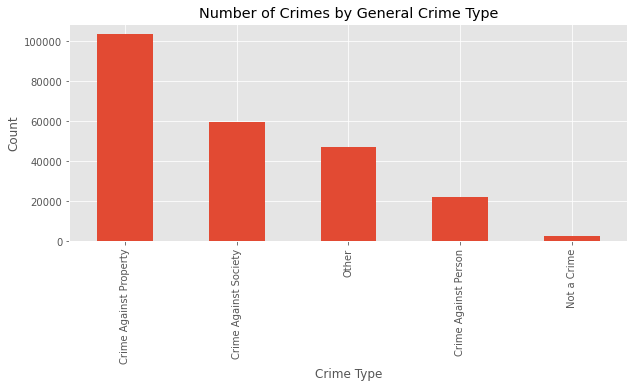

In [737]:
crime_type.plot(kind = 'bar', title = 'Number of Crimes by General Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [403]:
crime_type2 = dataframe5['Crime Name2'].value_counts()
crime_type2

All Other Offenses                             54639
Drug/Narcotic Violations                       21011
Theft From Motor Vehicle                       20699
Simple Assault                                 15516
Destruction/Damage/Vandalism of Property       14288
Driving Under the Influence                    12346
Shoplifting                                    12145
All other Larceny                              10698
Theft from Building                             8815
Burglary/Breaking and Entering                  6798
Liquor Law Violations                           6257
Identity Theft                                  4896
False Pretenses/Swindle/Confidence Game         4622
Disorderly Conduct                              4492
Motor Vehicle Theft                             4386
Theft of Motor Vehicle Parts or Accessories     4057
Trespass of Real Property                       3378
Credit Card/Automatic Teller Machine Fraud      3358
Aggravated Assault                            

In [404]:
crime_type2 = pd.DataFrame(crime_type2)
crime_type2 = crime_type2[crime_type2['Crime Name2'] > 5000]
crime_type2

Crime Name2
All Other Offenses                              54639
Drug/Narcotic Violations                        21011
Theft From Motor Vehicle                        20699
Simple Assault                                  15516
Destruction/Damage/Vandalism of Property        14288
Driving Under the Influence                     12346
Shoplifting                                     12145
All other Larceny                               10698
Theft from Building                              8815
Burglary/Breaking and Entering                   6798
Liquor Law Violations                            6257

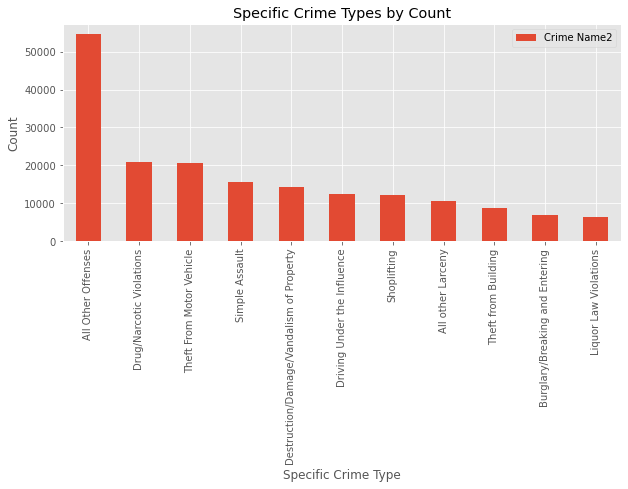

In [736]:
crime_type2.plot(kind='bar', title = 'Specific Crime Types by Count')
plt.xlabel('Specific Crime Type')
plt.ylabel('Count')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

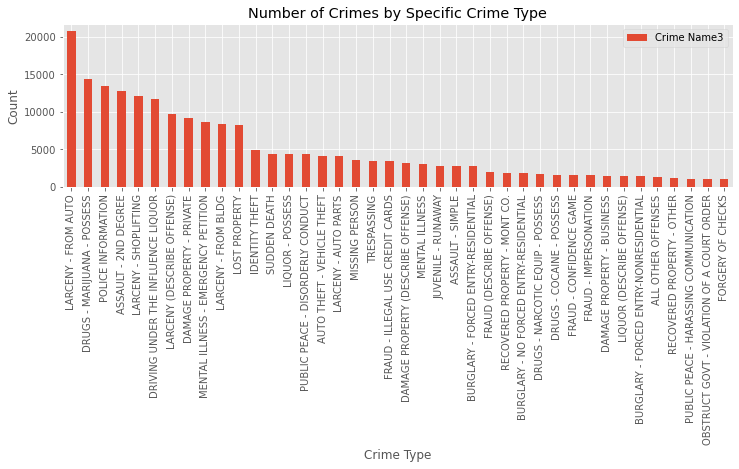

In [774]:
crime_type3 = dataframe5['Crime Name3'].value_counts().loc[lambda x: x > 1000]
crime_type3 = pd.DataFrame(crime_type3)
crime_type3.plot(kind='bar', title='Number of Crimes by Specific Crime Type')
fig = plt.gcf()
fig.set_size_inches(12,3)
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

In [406]:
district_count = dataframe5['Police District Name'].value_counts()

district_count.head()

SILVER SPRING         49991
WHEATON               45616
MONTGOMERY VILLAGE    40188
ROCKVILLE             32255
BETHESDA              31939
Name: Police District Name, dtype: int64

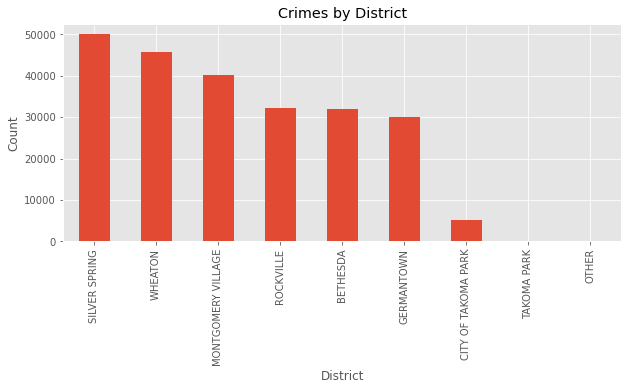

In [735]:
district_count.plot(kind = 'bar', title = 'Crimes by District')
plt.xlabel('District')
plt.ylabel('Count')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [408]:
city_count = dataframe5['City'].value_counts()

city_count.head()

SILVER SPRING    82571
GAITHERSBURG     34061
ROCKVILLE        32806
GERMANTOWN       23165
BETHESDA         15914
Name: City, dtype: int64

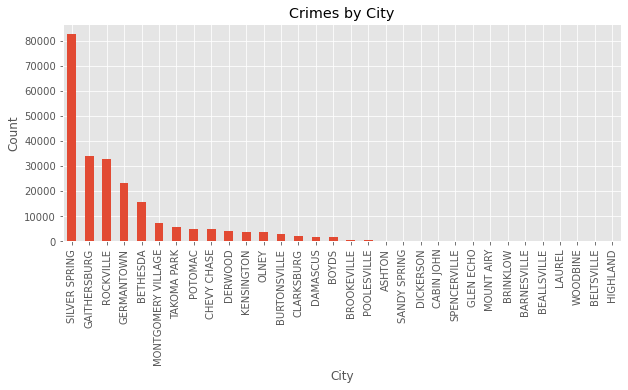

In [734]:
city_count.plot(kind = 'bar', title = 'Crimes by City')
plt.xlabel("City")
plt.ylabel("Count")
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [623]:
place_count = dataframe5['Place'].value_counts()

place_count = pd.DataFrame(place_count)
place_count

Place
Street - In vehicle          28634
Residence - Single Family    24919
Residence - Apartment/Condo  21224
Other/Unknown                17582
Street - Residential         15730
...                            ...
Pawn Shop                       48
Lake/Waterway                   38
Retail - Video Store            33
Nursery                         28
Pedestrian Tunnel                9

[83 rows x 1 columns]

In [624]:
place_count = place_count[place_count['Place'] > 500]
place_count

Place
Street - In vehicle                 28634
Residence - Single Family           24919
Residence - Apartment/Condo         21224
Other/Unknown                       17582
Street - Residential                15730
Parking Lot - Residential           11641
Residence -Townhouse/Duplex         10809
Residence - Driveway                 8705
Parking Lot - Commercial             8489
School/College                       6182
Retail - Department/Discount Store   6168
Street - Commercial                  6062
Street - Other                       4692
Restaurant                           4419
Retail - Mall                        4352
Grocery/Supermarket                  4056
Residence - Other                    3289
Retail - Other                       3084
Residence - Yard                     2701
Commercial - Office Building         2604
Government Building                  2482
Convenience Store                    2455
Street - Bus Stop                    1906
Hotel/Motel/Etc.                     1861
Parking Garage - Residential         1771
Hospital/Emergency Care Center       1631
Gas Station                          1589
Retail - Drug Store/Pharmacy         1494
Retail - Clothing                    1402
Park                                 1401
Parking Lot - Other                  1357
Parking Garage - Commercial          1214
Residence - Nursing Home             1152
Parking Garage - County              1110
Bar/Night Club                       1070
Bank - ATM                            987
Bank/S&L/Credit Union                 803
Auto Dealership                       774
Retail - Appliances/Electronics       729
Recreation Center                     719
Parking Lot - County                  662
Residence - Garage                    652
Parking Lot - School                  619
Residence - Apt Ofc/Storage           609
Street - Alley                        607
Air/Bus/Train/Metro Terminal          581
Liquor Store - Beer & Wine            543
Doctor/Dentist/Vet Office             534
Church/Synagogue/Temple               507

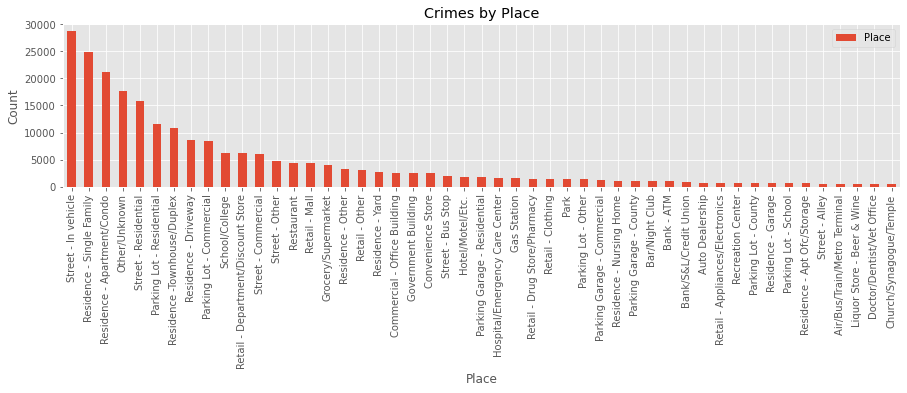

In [627]:
place_count.plot(kind='bar',title = 'Crimes by Place')
plt.xlabel('Place')
plt.ylabel('Count')
fig = plt.gcf()
fig.set_size_inches(15,3)
plt.show()

In [876]:
print(sum(dataframe5['Place'].value_counts().loc[lambda x: x > 8000]))
print(sum(dataframe5['Place'].value_counts()))

147733
235368


In [413]:
crimes_districts = dataframe5.groupby(['Crime Name1','Police District Name']).size().reset_index(name = 'Count')
crimes_districts = pd.DataFrame(crimes_districts)
crimes_districts.head()

Crime Name1 Police District Name  Count
0  Crime Against Person             BETHESDA   2108
1  Crime Against Person  CITY OF TAKOMA PARK    426
2  Crime Against Person           GERMANTOWN   3735
3  Crime Against Person   MONTGOMERY VILLAGE   4616
4  Crime Against Person            ROCKVILLE   2498

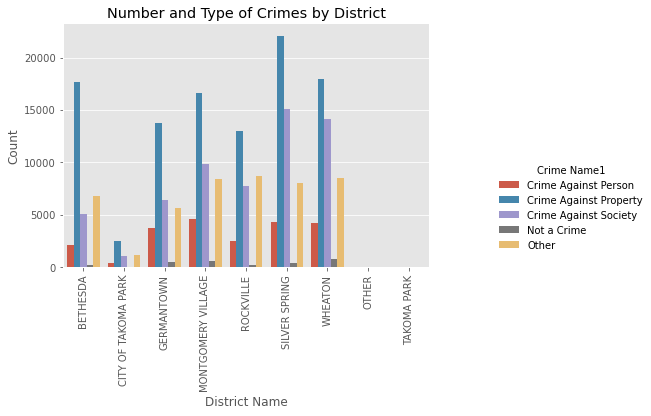

In [738]:
sns.catplot(x = 'Police District Name', y='Count', 
            hue = 'Crime Name1',data=crimes_districts, 
            kind='bar')

plt.title('Number and Type of Crimes by District')
plt.ylabel('Count')
plt.xlabel('District Name')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [819]:
crimes_places = dataframe5.groupby(['Crime Name1','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)
crimes_places.head()

Crime Name1                         Place  Count
0  Crime Against Person  Air/Bus/Train/Metro Terminal     75
1  Crime Against Person               Auto Dealership     18
2  Crime Against Person                   Auto Repair     20
3  Crime Against Person                    Bank - ATM     24
4  Crime Against Person         Bank/S&L/Credit Union     12

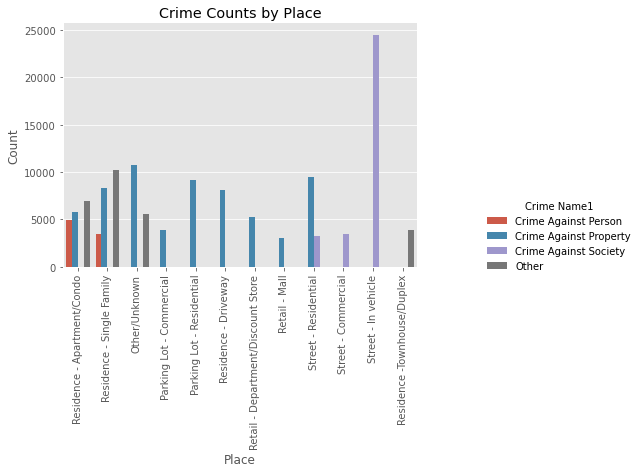

In [820]:
crimes_places1 = crimes_places[crimes_places['Count']>=3000]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name1',kind = 'bar', data = crimes_places1)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

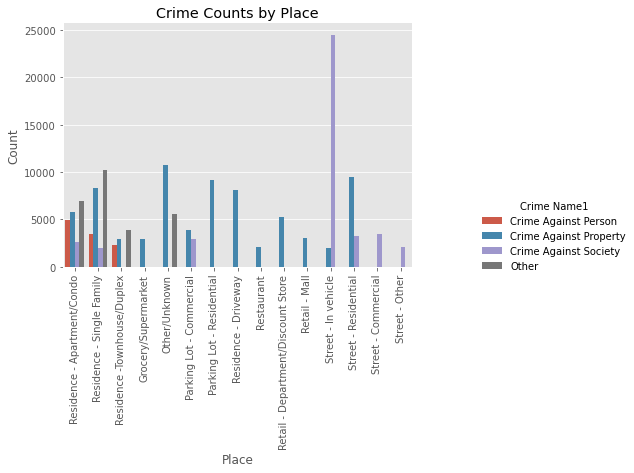

In [821]:
crimes_places1 = crimes_places[crimes_places['Count']>=2000]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name1',kind = 'bar', data = crimes_places1)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [786]:
def removeNA(hs):
    for column in hs.columns:
        for row in range(len(hs)):
            if pd.isnull(hs[column][row]):
                hs[column][row] = 0
    return hs

[]

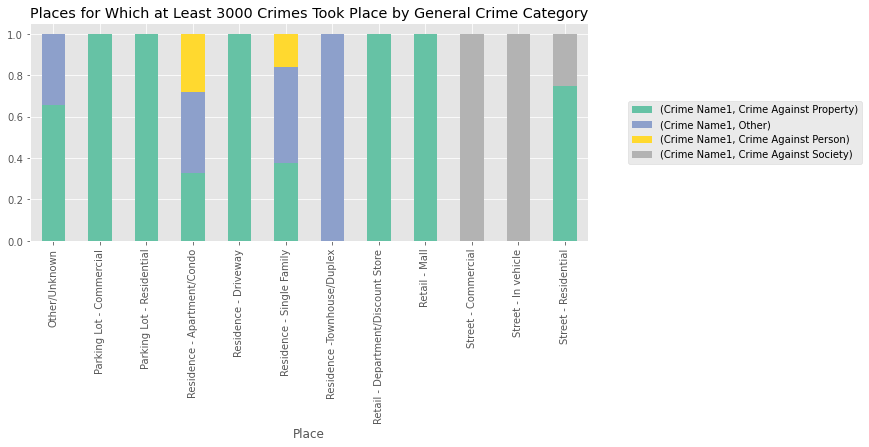

In [867]:
hs = pd.DataFrame(dataframe5.groupby(['Place','Crime Name1'])['Crime Name1'].count())
hs = hs[hs['Crime Name1'] >= 3000]
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Set2')
hs2.plot(kind='bar', stacked=True, title='Places for Which at Least 3000 Crimes Took Place by General Crime Category',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

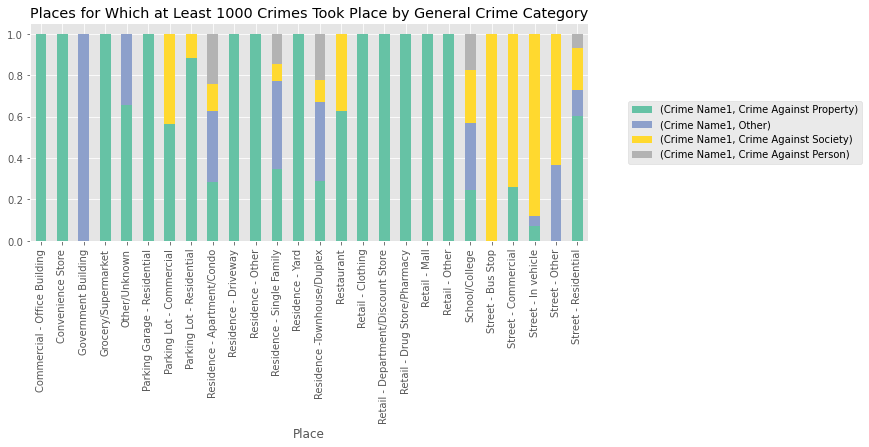

In [868]:
hs = pd.DataFrame(dataframe5.groupby(['Place','Crime Name1'])['Crime Name1'].count())
hs = hs[hs['Crime Name1'] >= 1000]
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Set2')
hs2.plot(kind='bar', stacked=True, title='Places for Which at Least 1000 Crimes Took Place by General Crime Category',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

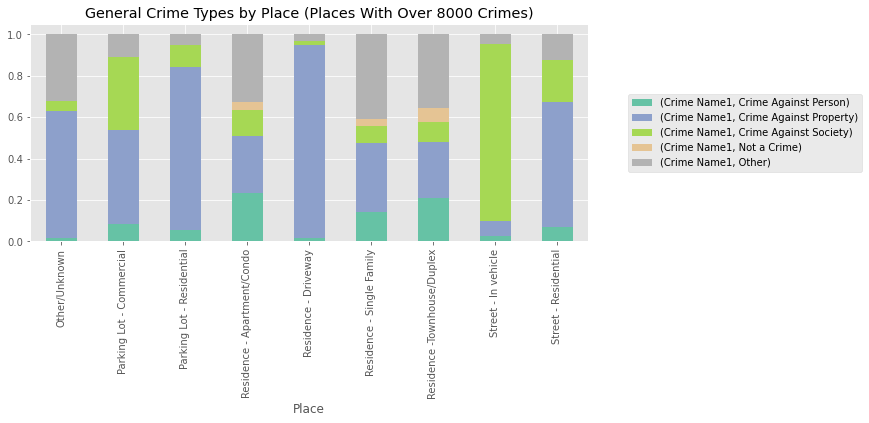

In [849]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 8000]
top_places_list = list(top_places.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list))]

cp = top_crimes_data.groupby(['Place','Crime Name1'])['Crime Name1'].count()
cp = pd.DataFrame(cp)
cp = cp.unstack()
cp = removeNA(cp)
cp2 = cp.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Set2')
cp2.plot(kind='bar', stacked=True, title='General Crime Types by Place (Places With Over 8000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

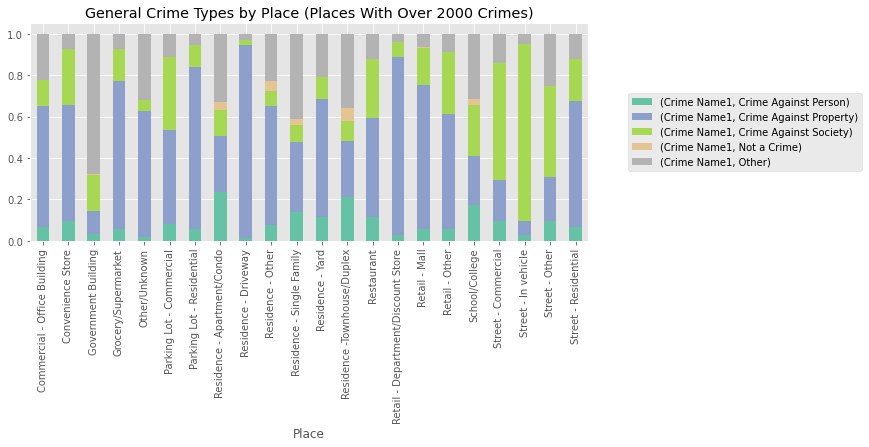

In [811]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 2000]
top_places_list = list(top_places.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list))]

cp = top_crimes_data.groupby(['Place','Crime Name1'])['Crime Name1'].count()
cp = pd.DataFrame(cp)
cp = cp.unstack()
cp = removeNA(cp)
cp2 = cp.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Set2')
cp2.plot(kind='bar', stacked=True, title='General Crime Types by Place (Places With Over 2000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

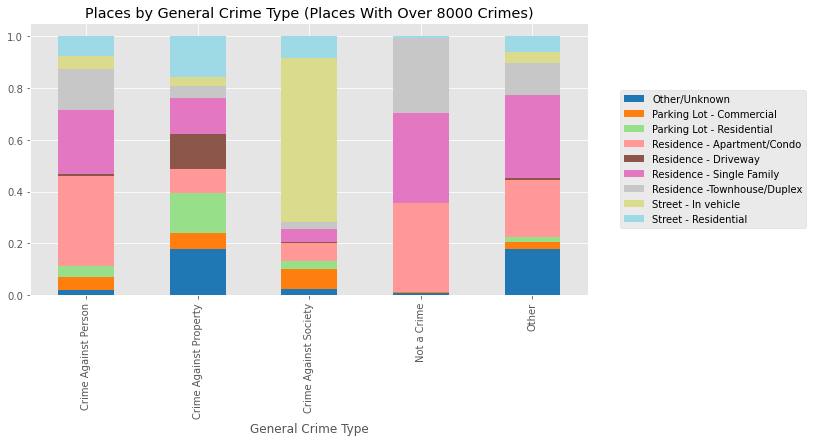

In [807]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 8000]
top_places_list = list(top_places.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name1','Place'])['Place'].count()
hs = hs.unstack()

hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Places by General Crime Type (Places With Over 8000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
plt.xlabel('General Crime Type')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.plot()

[]

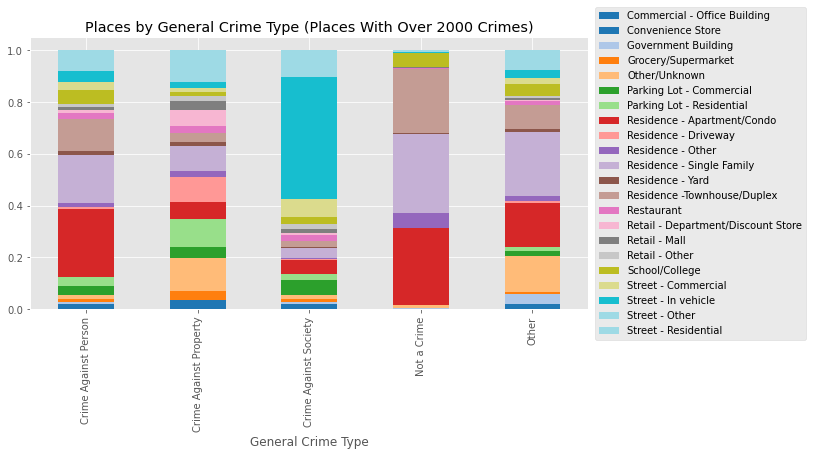

In [798]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 2000]
top_places_list = list(top_places.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name1','Place'])['Place'].count()
hs = hs.unstack()

hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Places by General Crime Type (Places With Over 2000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xlabel('General Crime Type')
plt.plot()

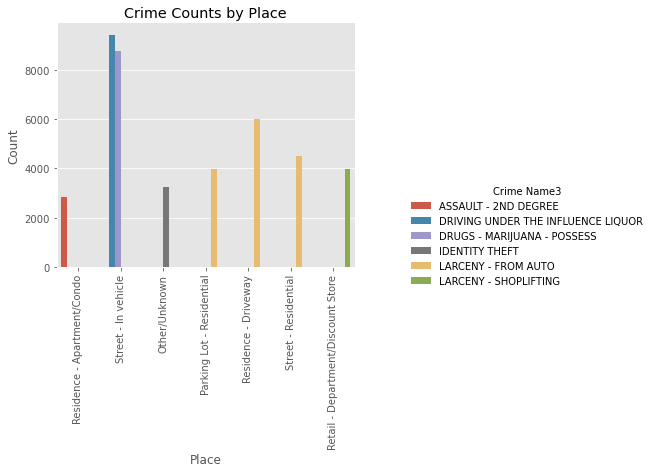

In [741]:
data_no_other = dataframe5[dataframe5['Crime Name1'] != 'Other']

crimes_places3 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places3 = pd.DataFrame(crimes_places3)

crimes_places3 = crimes_places3[crimes_places3['Count']>2000]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places3)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

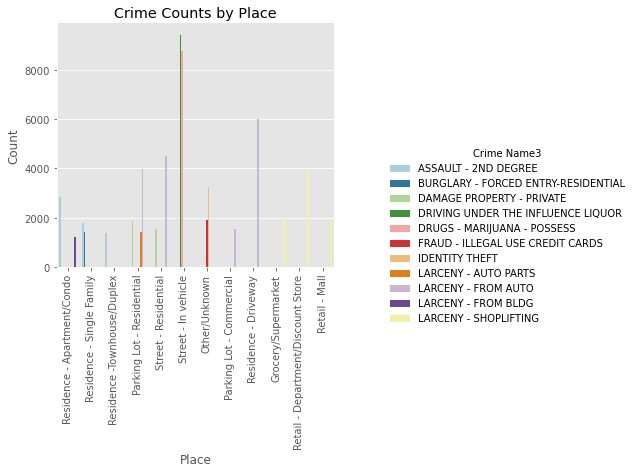

In [854]:
data_no_other = dataframe5[dataframe5['Crime Name1'] != 'Other']

crimes_places3 = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places3 = pd.DataFrame(crimes_places3)

crimes_places3 = crimes_places3[crimes_places3['Count']>1100]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places3, palette = sns.color_palette('Paired'))
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

[]

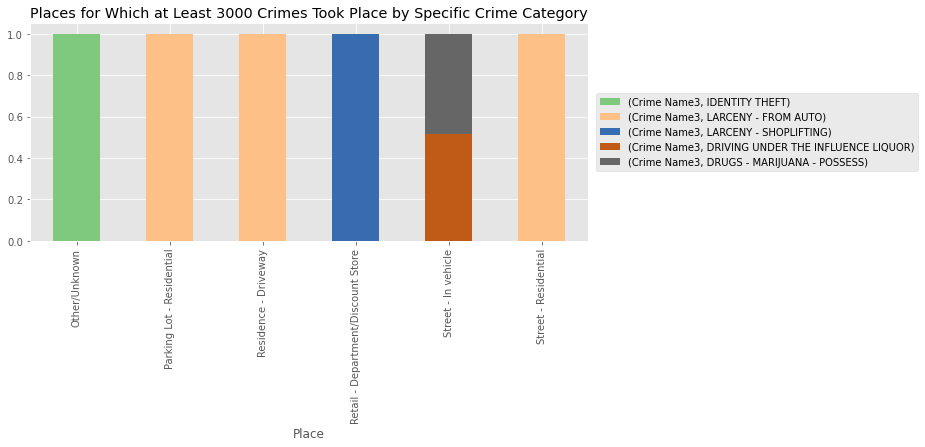

In [875]:
hs = pd.DataFrame(data_no_other.groupby(['Place','Crime Name3'])['Crime Name3'].count())
hs = hs[hs['Crime Name3'] > 3000]
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Accent')
hs2.plot(kind='bar', stacked=True, title='Places for Which at Least 3000 Crimes Took Place by Specific Crime Category',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.6,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

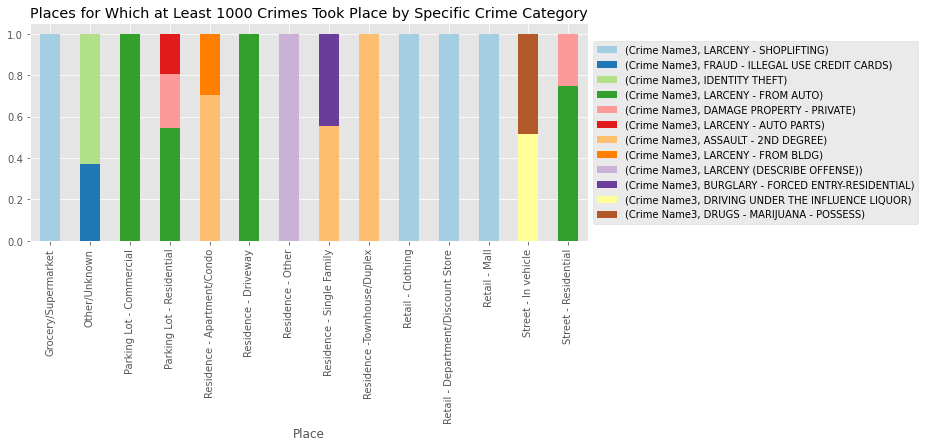

In [873]:
hs = pd.DataFrame(data_no_other.groupby(['Place','Crime Name3'])['Crime Name3'].count())
hs = hs[hs['Crime Name3'] > 1000]
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Paired')
hs2.plot(kind='bar', stacked=True, title='Places for Which at Least 1000 Crimes Took Place by Specific Crime Category',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.6,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

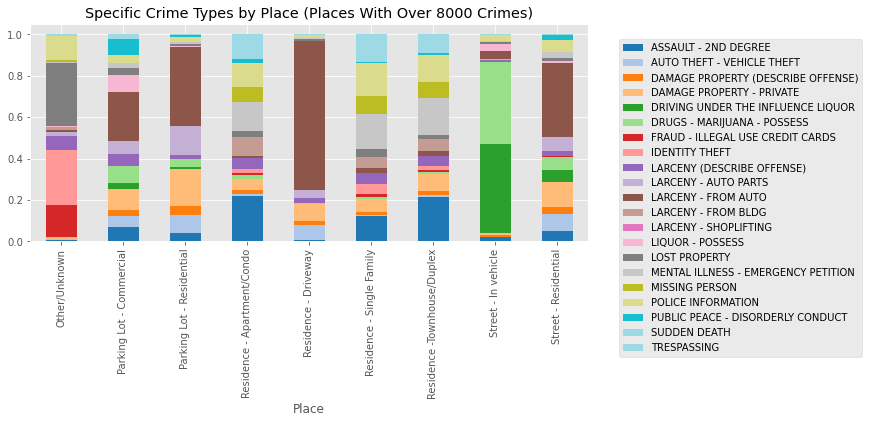

In [806]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 8000]
top_places_list = list(top_places.index.values)

top_types = dataframe5['Crime Name3'].value_counts().loc[lambda x: x > 3000]
top_types_list = list(top_types.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list)) & 
                            (dataframe5['Crime Name3'].isin(top_types_list))]

hs = top_crimes_data.groupby(['Place','Crime Name3'])['Crime Name3'].count()
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Specific Crime Types by Place (Places With Over 8000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.2))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

[]

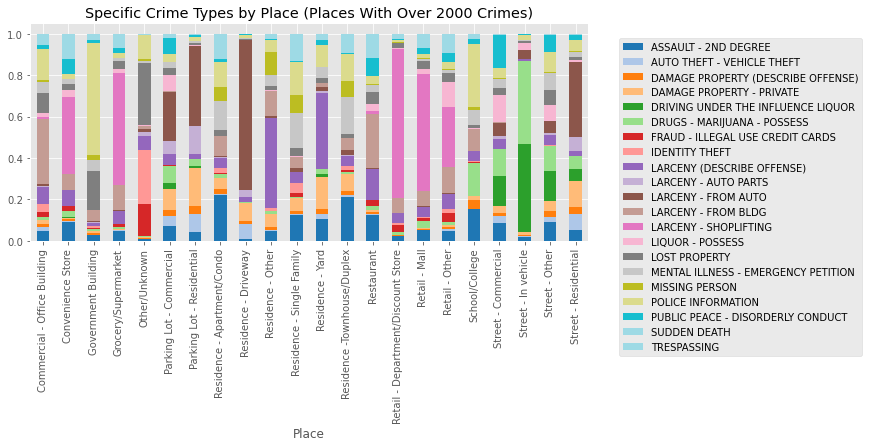

In [816]:
top_places = dataframe5['Place'].value_counts().loc[lambda x: x > 2000]
top_places_list = list(top_places.index.values)

top_types = dataframe5['Crime Name3'].value_counts().loc[lambda x: x > 3000]
top_types_list = list(top_types.index.values)

top_crimes_data = dataframe5[(dataframe5['Place'].isin(top_places_list)) & 
                            (dataframe5['Crime Name3'].isin(top_types_list))]

hs = top_crimes_data.groupby(['Place','Crime Name3'])['Crime Name3'].count()
hs = hs.unstack()
hs = removeNA(hs)
hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Specific Crime Types by Place (Places With Over 2000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.5,0.2))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

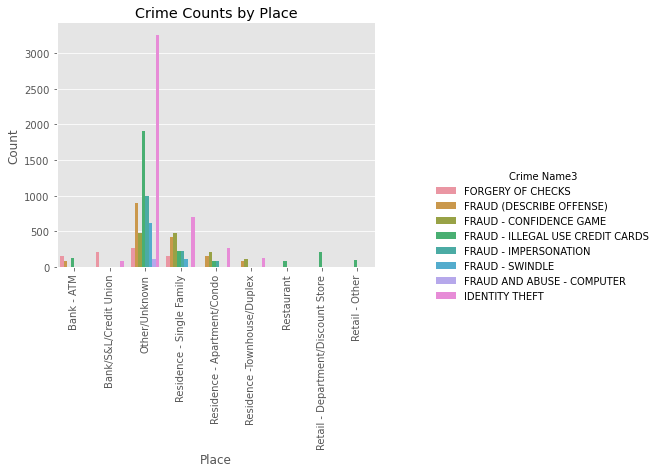

In [775]:
crimes_places = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)

crimes_places12 = crimes_places[((crimes_places['Crime Name3'].str.contains('FRAUD')) | 
                                 (crimes_places['Crime Name3'].str.contains('IDENTITY')) |
                                 (crimes_places['Crime Name3'].str.contains('EMBEZZLE')) |
                                 (crimes_places['Crime Name3'].str.contains('FORGERY'))) & 
                                (crimes_places['Count'] > 75)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places12)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

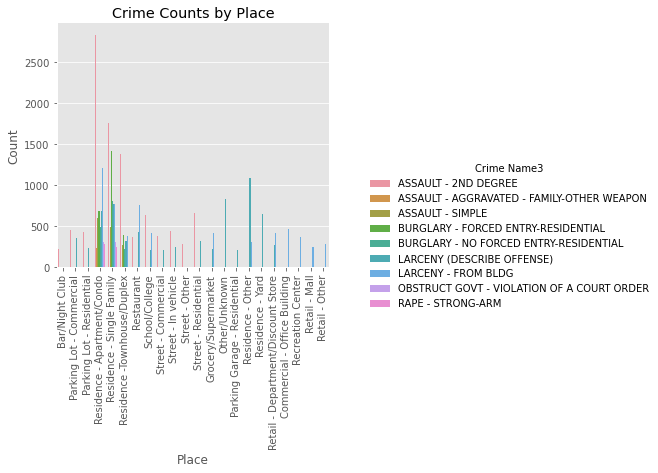

In [776]:
crimes_places15 = crimes_places[((crimes_places['Crime Name3'].str.contains('ASSAULT')) | 
                                 (crimes_places['Crime Name3'].str.contains('RAPE')) |
                                 (crimes_places['Crime Name3'].str.contains('BLDG')) |
                                 (crimes_places['Crime Name3'].str.contains('SEX')) |
                                (crimes_places['Crime Name3'].str.contains('FORCED')) | 
                                 (crimes_places['Crime Name3'].str.contains('LARCENY \(DESCRIBE OFFENSE\)')) |
                                 (crimes_places['Crime Name3'].str.contains('FAMILY')) |
                                 (crimes_places['Crime Name3'].str.contains('OBSTRUCT GOVT'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places15)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

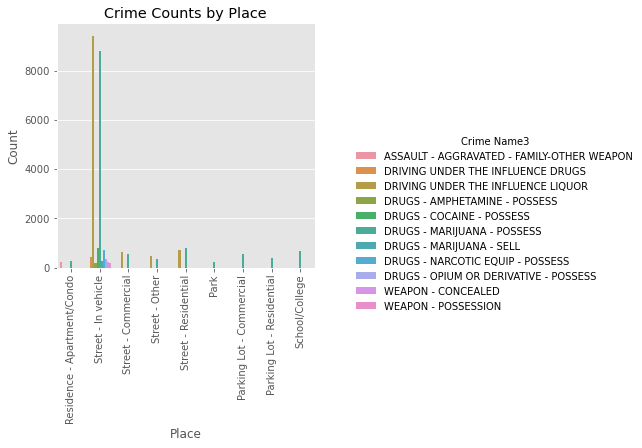

In [777]:
crimes_places14 = crimes_places[((crimes_places['Crime Name3'].str.contains('DRUGS')) | 
                               (crimes_places['Crime Name3'].str.contains('INFLUENCE')) | 
                                (crimes_places['Crime Name3'].str.contains('OBSTRUCT POLICE')) |
                                (crimes_places['Crime Name3'].str.contains('WEAPON'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places14)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

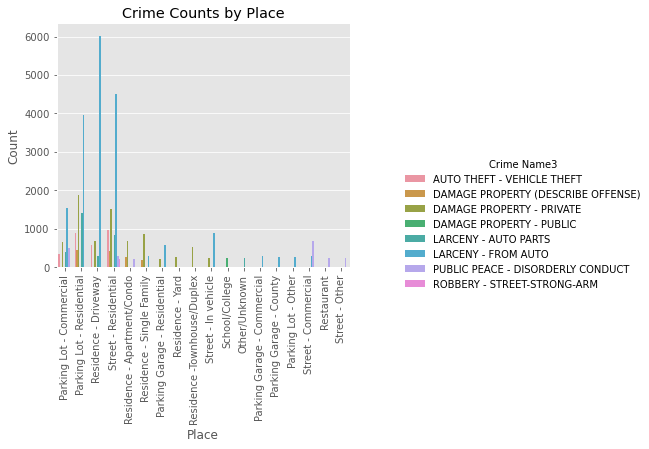

In [778]:
crimes_places15 = crimes_places[((crimes_places['Crime Name3'].str.contains('DAMAGE PROPERTY')) | 
                               (crimes_places['Crime Name3'].str.contains('AUTO')) | 
                                (crimes_places['Crime Name3'].str.contains('DISORDERLY CONDUCT')) |
                                (crimes_places['Crime Name3'].str.contains('ROBBERY'))) & 
                                (crimes_places['Count'] > 200)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places15)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

[]

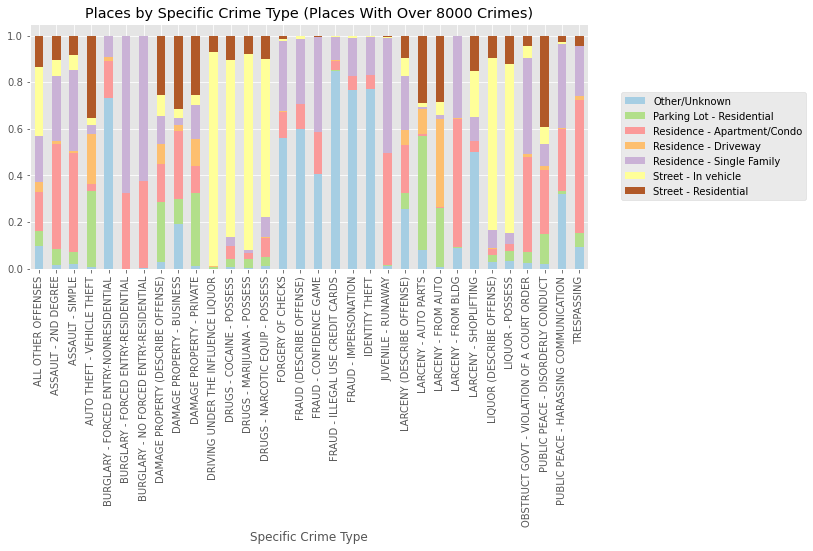

In [878]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 1000]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 8000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('Paired')
hs2.plot(kind='bar', stacked=True, title='Places by Specific Crime Type (Places With Over 8000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4.5)
plt.xlabel('Specific Crime Type')
plt.plot()

[]

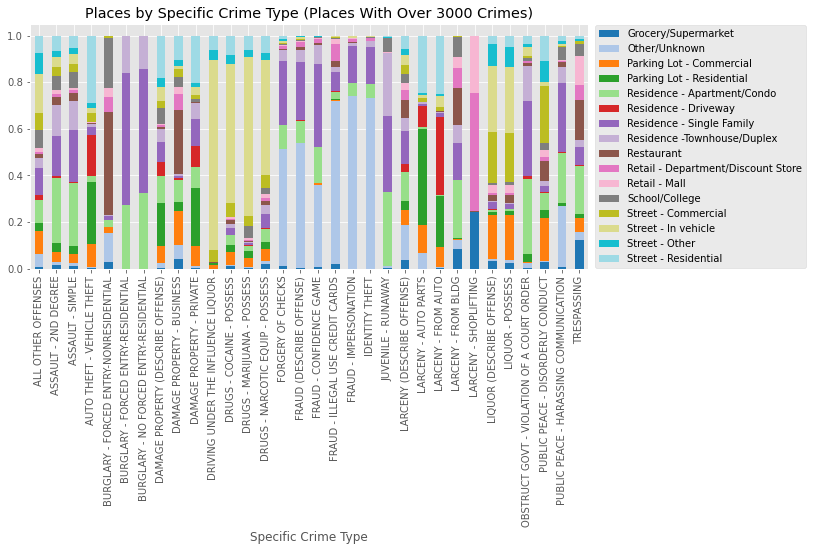

In [682]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 1000]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 3000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()

hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Places by Specific Crime Type (Places With Over 3000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.5))
fig = plt.gcf()
fig.set_size_inches(10,4.5)
plt.xlabel('Specific Crime Type')
plt.plot()

[]

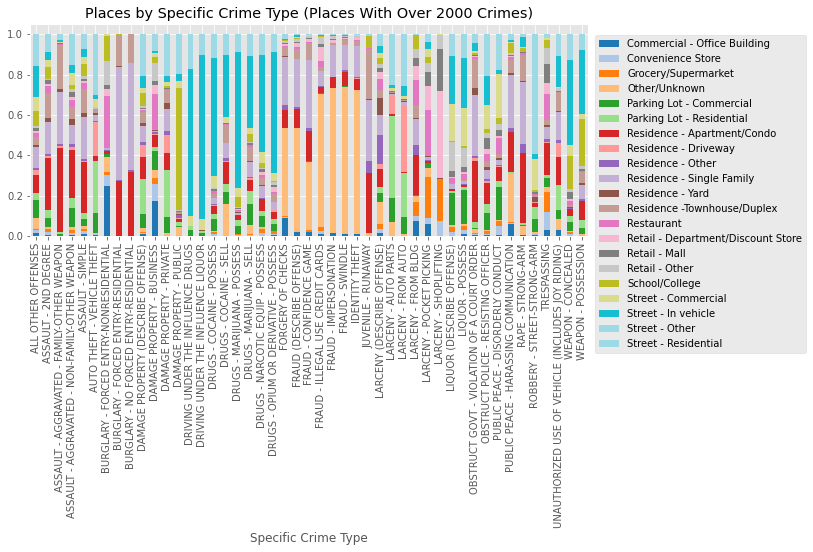

In [695]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 500]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 2000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()
hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('tab20')
hs2.plot(kind='bar', stacked=True, title='Places by Specific Crime Type (Places With Over 2000 Crimes)',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0.2))
fig = plt.gcf()
fig.set_size_inches(10,3.9)
plt.xlabel('Specific Crime Type')
plt.plot()

[]

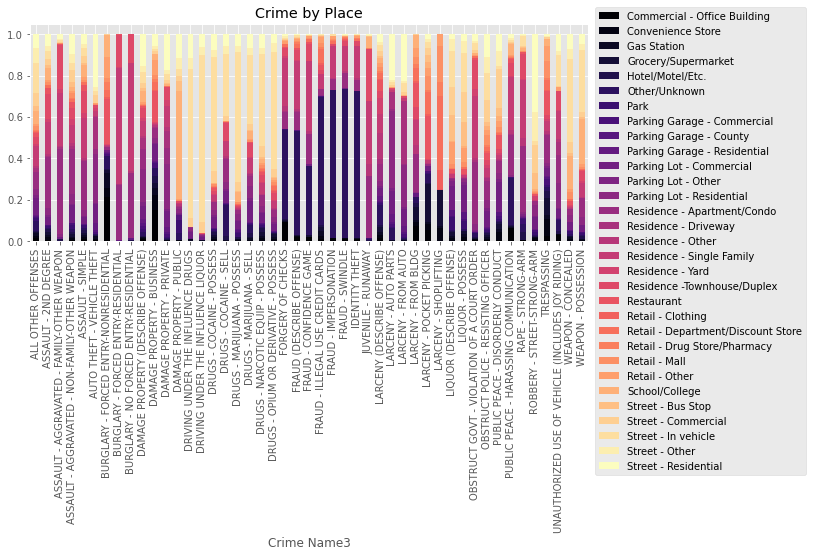

In [814]:
top_crimes = data_no_other['Crime Name3'].value_counts().loc[lambda x: x > 500]
top_crimes_list = list(top_crimes.index.values)

top_places = data_no_other['Place'].value_counts().loc[lambda x: x > 1000]
top_places_list = list(top_places.index.values)

top_crimes_data = data_no_other[(data_no_other['Crime Name3'].isin(top_crimes_list)) & 
                                (data_no_other['Place'].isin(top_places_list))]

hs = top_crimes_data.groupby(['Crime Name3','Place'])['Place'].count()
hs = hs.unstack()
hs = removeNA(hs)

hs2 = hs.apply(lambda x: x/sum(x),axis=1)
cm = plt.get_cmap('magma')
hs2.plot(kind='bar', stacked=True, title='Crime by Place',cmap=cm)
plt.legend(loc='center right',bbox_to_anchor=(1.4,0))
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.plot()

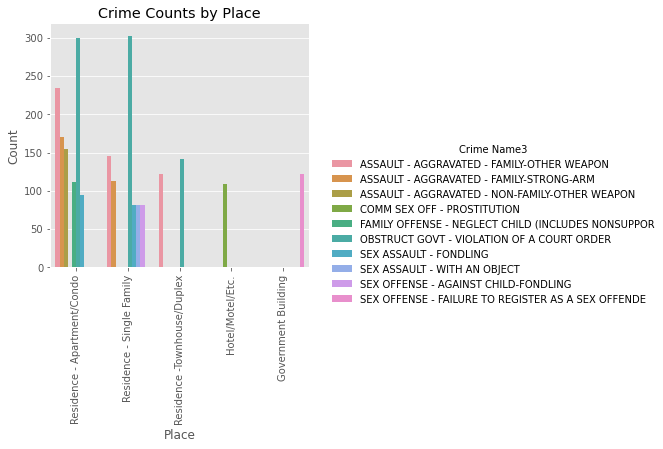

In [745]:
crimes_places = data_no_other.groupby(['Crime Name3','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)

crimes_places10 = crimes_places[((crimes_places['Crime Name3'].str.contains('SEX')) | 
                               (crimes_places['Crime Name3'].str.contains('FAMILY')) | 
                                (crimes_places['Crime Name3'].str.contains('OBSTRUCT GOVT'))) & 
                                (crimes_places['Count'] > 75)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places10)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

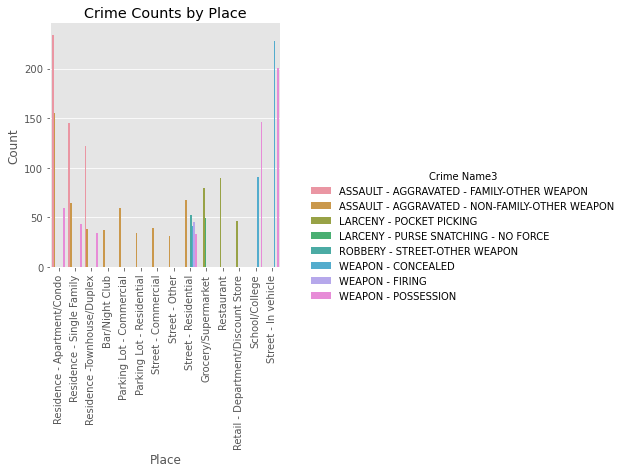

In [746]:
crimes_places11 = crimes_places[((crimes_places['Crime Name3'].str.contains('ROBERRY')) | 
                               (crimes_places['Crime Name3'].str.contains('WEAPON')) | 
                                (crimes_places['Crime Name3'].str.contains('POCKET')) |
                                (crimes_places['Crime Name3'].str.contains('SNATCHING'))) & 
                                (crimes_places['Count'] > 30)]

sns.catplot(x = 'Place', y = 'Count' , hue = 'Crime Name3',kind = 'bar', data = crimes_places11)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

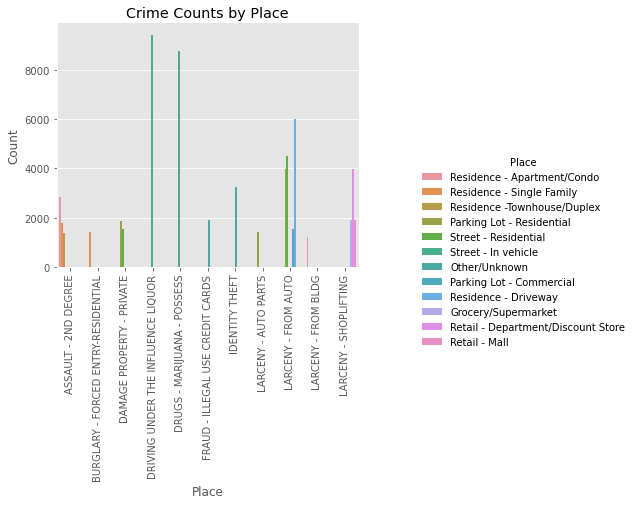

In [747]:
sns.catplot(x = 'Crime Name3', y = 'Count' , hue = 'Place',kind = 'bar', data = crimes_places3)
plt.title('Crime Counts by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation = 90)
fig = plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [440]:
crimes_district2 = crimes_districts.pivot(index = 'Police District Name', columns = 'Crime Name1', values = 'Count')
crimes_district2

Crime Name1           Crime Against Person  Crime Against Property  \
Police District Name                                                 
BETHESDA                            2108.0                 17624.0   
CITY OF TAKOMA PARK                  426.0                  2506.0   
GERMANTOWN                          3735.0                 13755.0   
MONTGOMERY VILLAGE                  4616.0                 16663.0   
OTHER                                  NaN                     1.0   
ROCKVILLE                           2498.0                 13041.0   
SILVER SPRING                       4284.0                 22096.0   
TAKOMA PARK                            NaN                     NaN   
WHEATON                             4237.0                 17983.0   

Crime Name1           Crime Against Society  Not a Crime   Other  
Police District Name                                              
BETHESDA                             5084.0        248.0  6851.0  
CITY OF TAKOMA PARK                  1119.0         63.0  1142.0  
GERMANTOWN                           6440.0        483.0  5673.0  
MONTGOMERY VILLAGE                   9877.0        609.0  8397.0  
OTHER                                   NaN          NaN     NaN  
ROCKVILLE                            7744.0        195.0  8738.0  
SILVER SPRING                       15069.0        445.0  8078.0  
TAKOMA PARK                             3.0          NaN     NaN  
WHEATON                             14101.0        774.0  8497.0

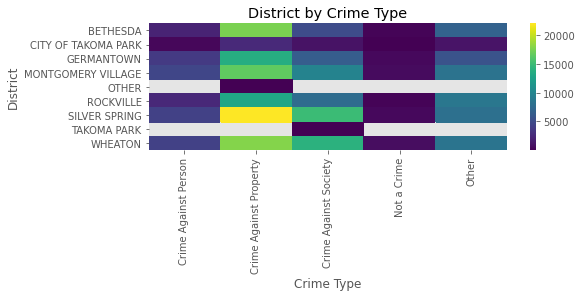

In [748]:
sns.heatmap(crimes_district2, cmap="viridis" ,fmt='g')
plt.tight_layout()
plt.title('District by Crime Type', y=1.1)
plt.ylabel('District')
plt.xlabel('Crime Type')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [443]:
crimes_places = dataframe5.groupby(['Crime Name1','Place']).size().reset_index(name = 'Count')
crimes_places = pd.DataFrame(crimes_places)
crimes_places.head()

Crime Name1                         Place  Count
0  Crime Against Person  Air/Bus/Train/Metro Terminal     75
1  Crime Against Person               Auto Dealership     18
2  Crime Against Person                   Auto Repair     20
3  Crime Against Person                    Bank - ATM     24
4  Crime Against Person         Bank/S&L/Credit Union     12

In [444]:
crimes_places2 = crimes_places.pivot(index = 'Place', columns = 'Crime Name1', values = 'Count')
crimes_places2

Crime Name1                   Crime Against Person  Crime Against Property  \
Place                                                                        
Air/Bus/Train/Metro Terminal                  75.0                   151.0   
Auto Dealership                               18.0                   505.0   
Auto Repair                                   20.0                   250.0   
Bank - ATM                                    24.0                   830.0   
Bank/S&L/Credit Union                         12.0                   697.0   
...                                            ...                     ...   
Street - In vehicle                          750.0                  2010.0   
Street - Other                               453.0                   980.0   
Street - Residential                        1075.0                  9508.0   
Theater                                        9.0                    68.0   
Wooded Area                                   56.0                    60.0   

Crime Name1                   Crime Against Society  Not a Crime   Other  
Place                                                                     
Air/Bus/Train/Metro Terminal                  132.0          NaN   221.0  
Auto Dealership                                59.0          NaN   192.0  
Auto Repair                                    10.0          NaN    43.0  
Bank - ATM                                     43.0          NaN    90.0  
Bank/S&L/Credit Union                          28.0          NaN    66.0  
...                                             ...          ...     ...  
Street - In vehicle                         24486.0          5.0  1376.0  
Street - Other                               2061.0          9.0  1185.0  
Street - Residential                         3221.0         11.0  1914.0  
Theater                                        28.0          1.0    42.0  
Wooded Area                                   104.0          NaN   164.0  

[83 rows x 5 columns]

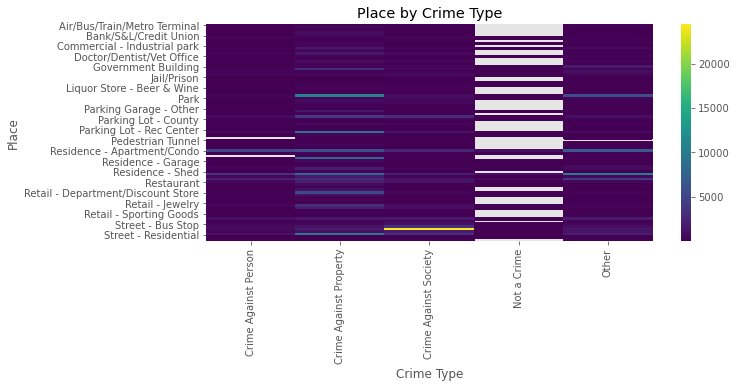

In [749]:
sns.heatmap(crimes_places2, cmap = 'viridis', fmt='g')
plt.title('Place by Crime Type', y=1.1)
plt.ylabel('Place')
plt.xlabel('Crime Type')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [446]:
crime_crime = dataframe5.groupby(['Crime Name1','Crime Name2']).size().reset_index(name='Count')
crime_crime.head()

Crime Name1         Crime Name2  Count
0  Crime Against Person  Aggravated Assault   3037
1  Crime Against Person  All Other Offenses    103
2  Crime Against Person            Fondling    740
3  Crime Against Person   Forcible Fondling    355
4  Crime Against Person       Forcible Rape    972

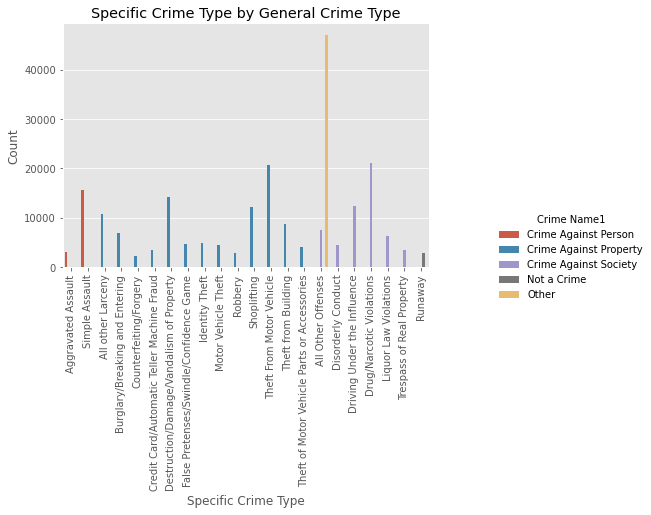

In [751]:
crime_crime_sub = crime_crime[crime_crime['Count']>2000]
sns.catplot(x='Crime Name2', y = 'Count', hue='Crime Name1', kind = 'bar', data = crime_crime_sub)
plt.xlabel('Specific Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.title('Specific Crime Type by General Crime Type')
plt.show()

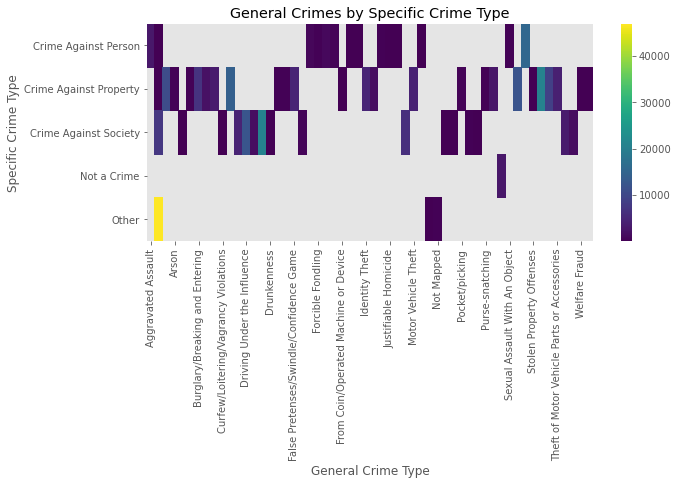

In [752]:
crime_crime2 = crime_crime.pivot(index = 'Crime Name1', columns = 'Crime Name2', values = 'Count')

sns.heatmap(crime_crime2, cmap = 'viridis', fmt = 'g')
plt.xlabel('General Crime Type')
plt.ylabel('Specific Crime Type')
plt.title('General Crimes by Specific Crime Type')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [716]:
top_crimes = dataframe5['Crime Name3'].value_counts().loc[lambda x: x > 1000]

top_crimes_list = list(top_crimes.index.values)

top_crimes_data = dataframe5[dataframe5['Crime Name3'].isin(top_crimes_list)]

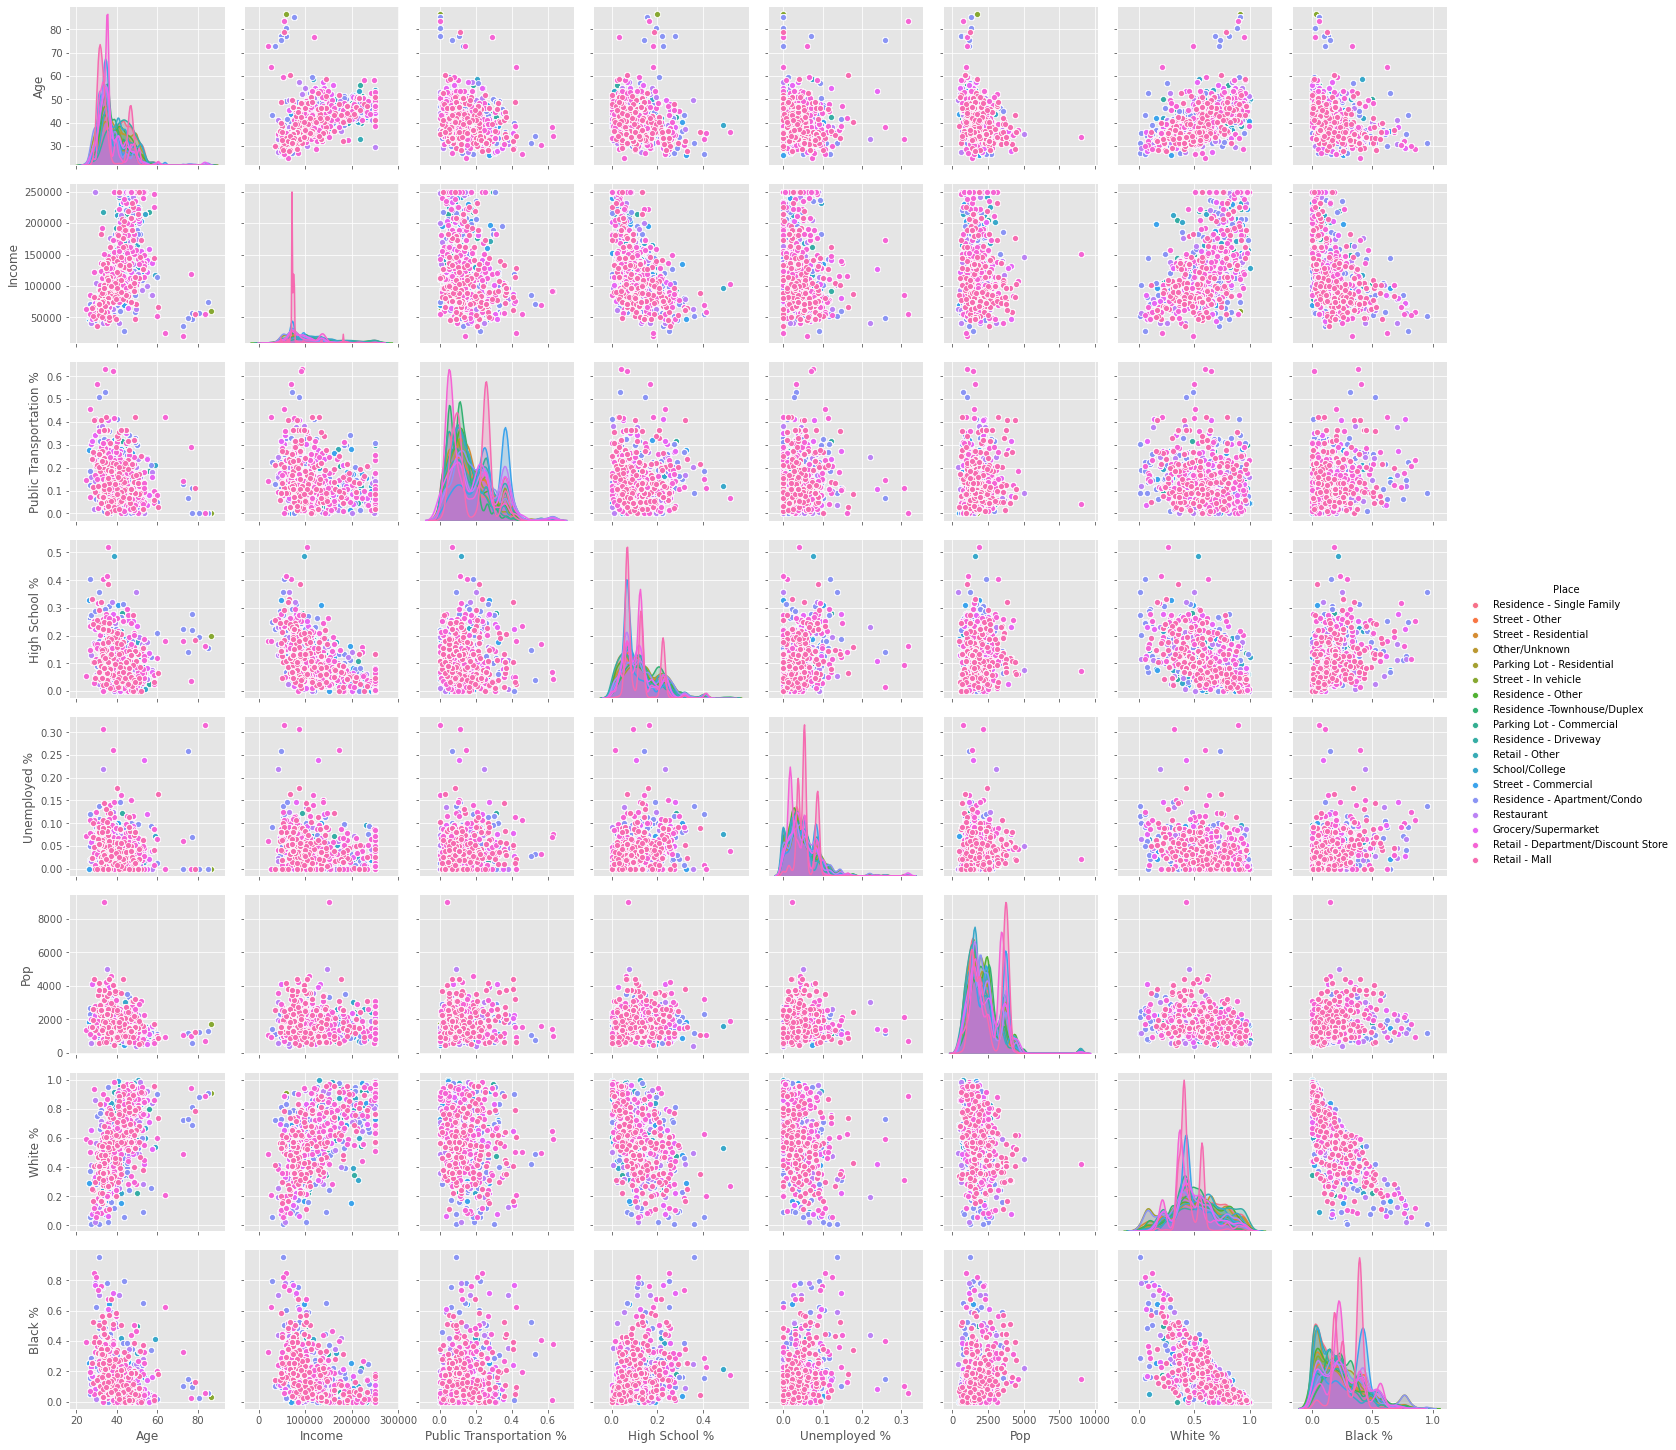

In [784]:
sns.pairplot(places_sub, vars = ['Age','Income','Public Transportation %','High School %','Unemployed %','Pop','White %','Black %'], hue='Place')
plt.show()


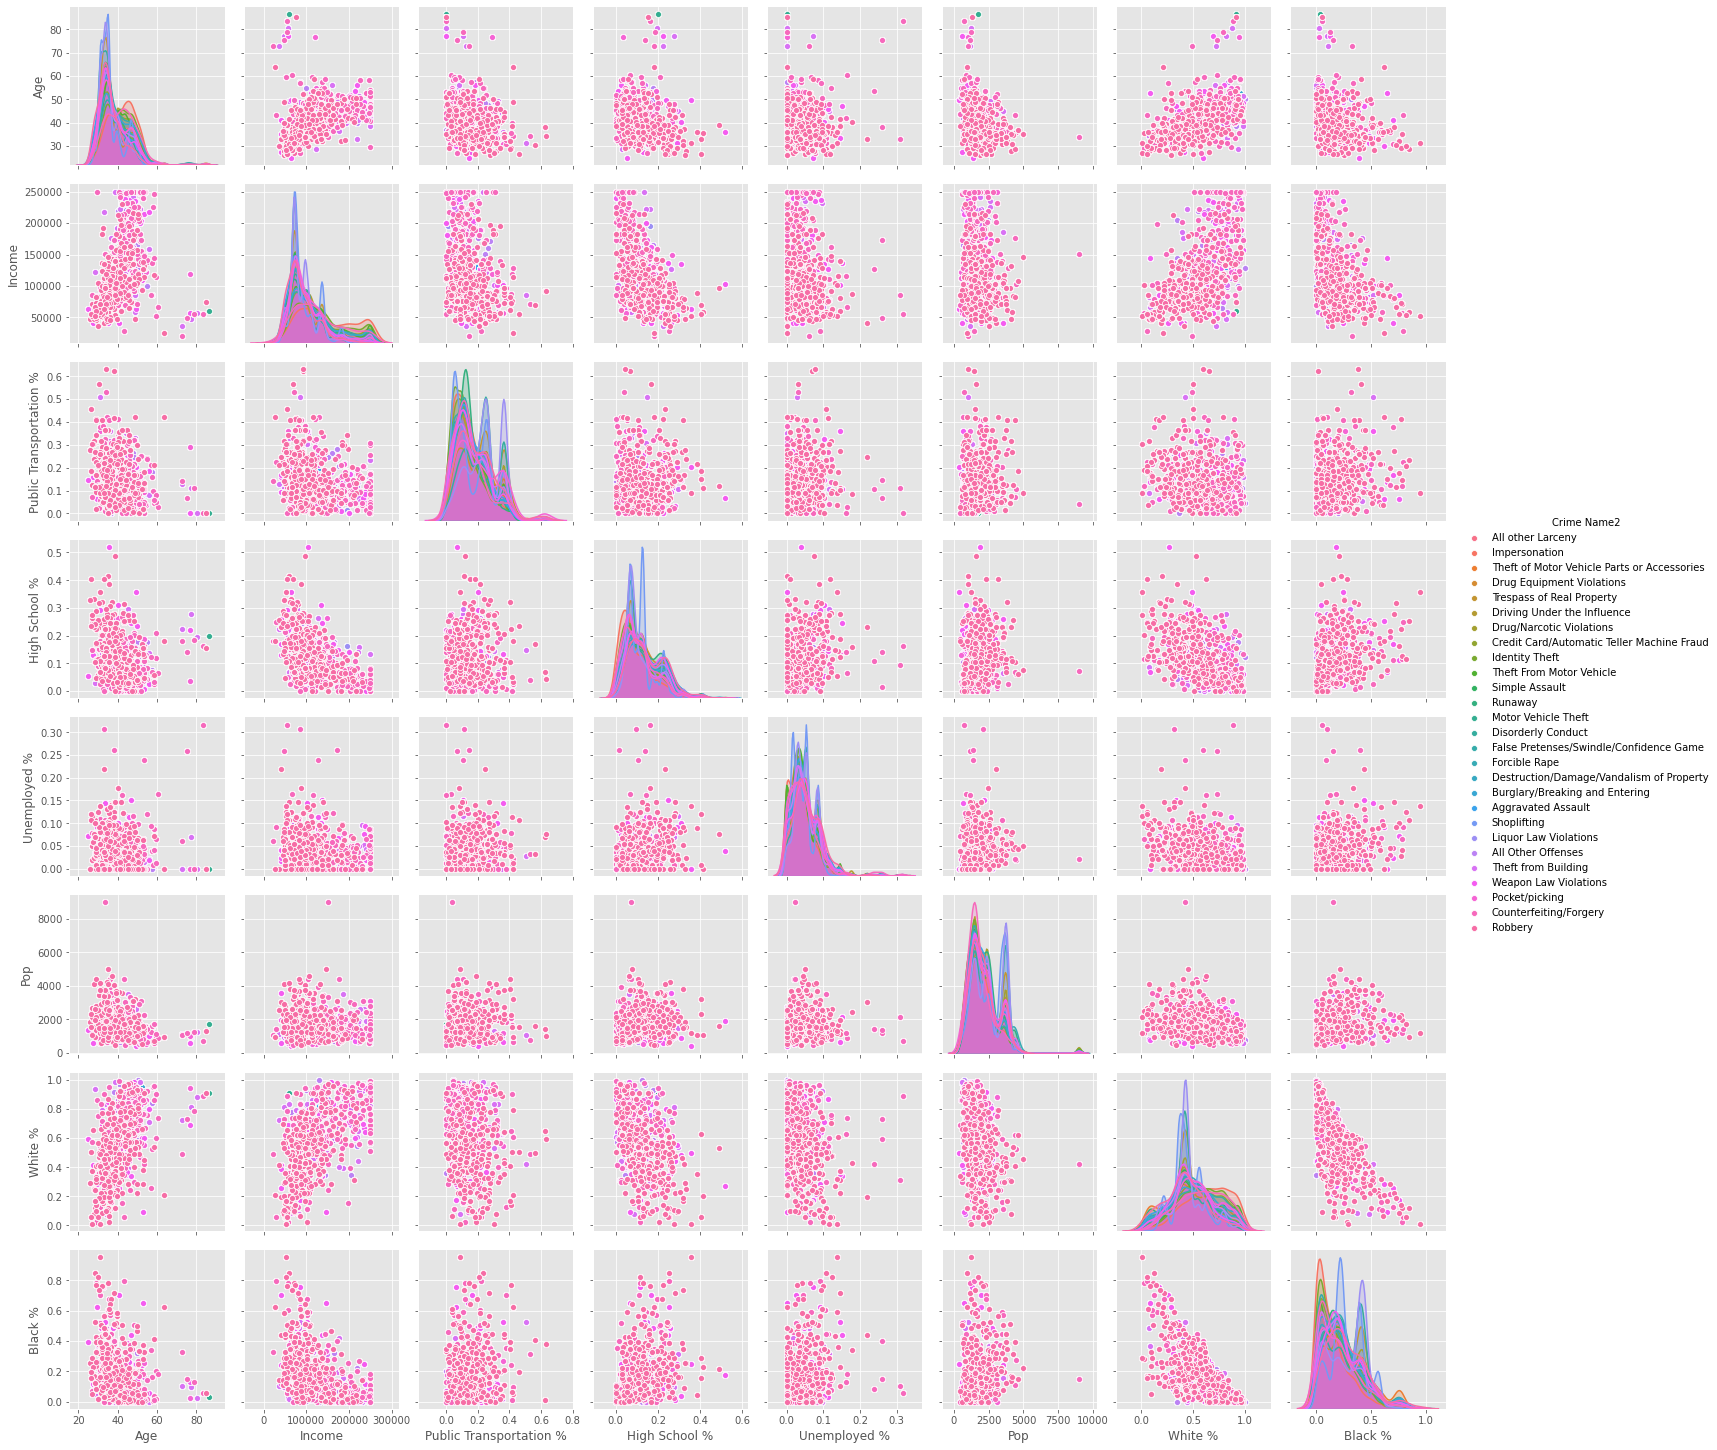

In [781]:
sns.pairplot(top_crimes_data, vars = ['Age','Income','Public Transportation %','High School %','Unemployed %','Pop','White %','Black %'], hue='Crime Name2')
plt.show()

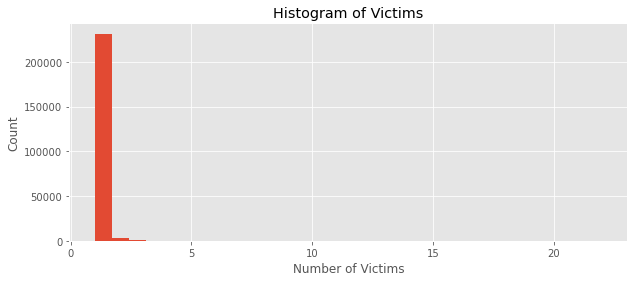

In [753]:
vics = dataframe5.Victims
plt.hist(vics,bins=30)

plt.title('Histogram of Victims')
plt.ylabel('Count')
plt.xlabel('Number of Victims')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

### Analysis of Census Dataset Variables

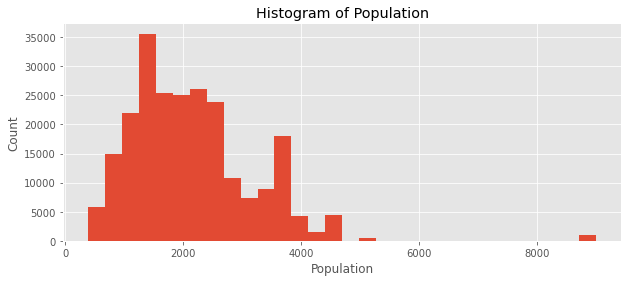

In [754]:
pop = dataframe5.Pop
plt.hist(pop, bins=30)

plt.title('Histogram of Population')
plt.ylabel('Count')
plt.xlabel('Population')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

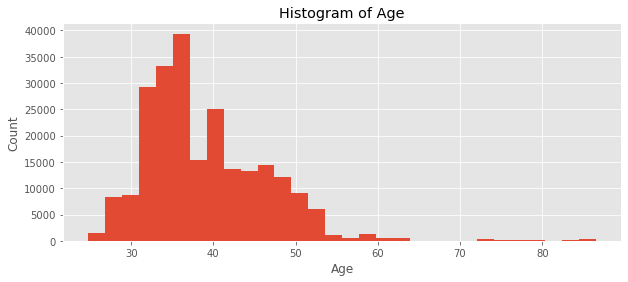

In [755]:
age = dataframe5.Age
plt.hist(age, bins=30)

plt.title('Histogram of Age')
plt.ylabel('Count')
plt.xlabel('Age')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

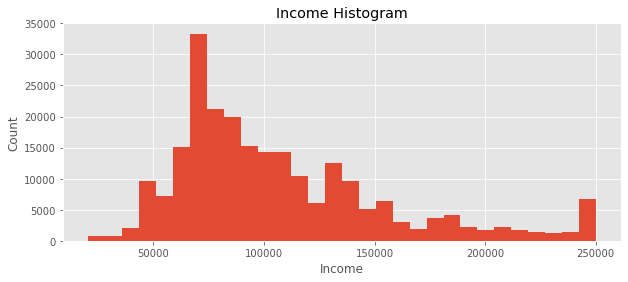

In [756]:
# Histogram of income
income = dataframe5.Income
plt.hist(income, bins = 30)

plt.title('Income Histogram')
plt.ylabel('Count')
plt.xlabel('Income')
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

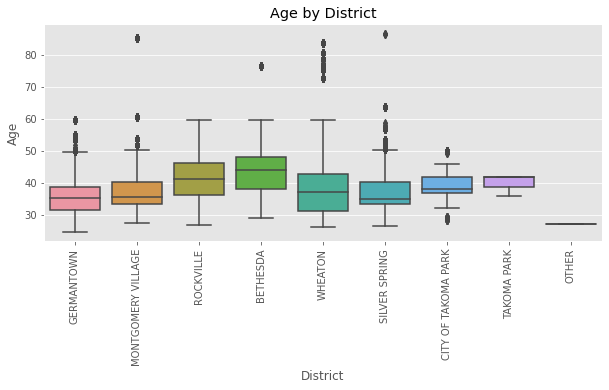

In [757]:
age_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Age')

plt.title('Age by District')
plt.ylabel('Age')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

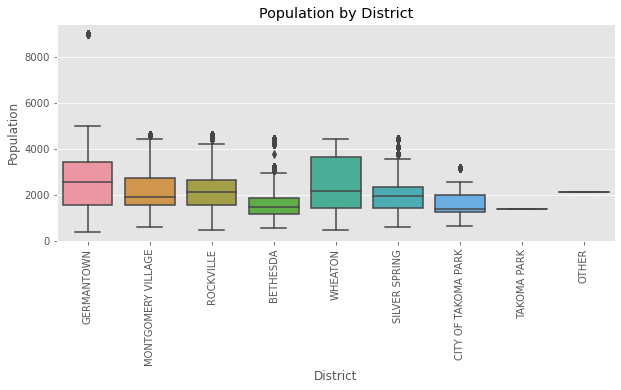

In [758]:
pop_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Pop')

plt.title('Population by District')
plt.ylabel('Population')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

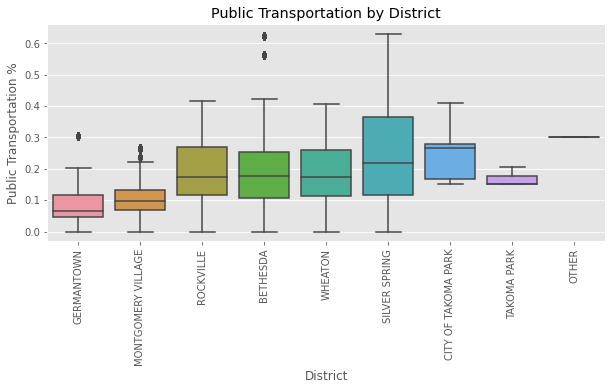

In [759]:
trans_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Public Transportation %')

plt.title('Public Transportation by District')
plt.ylabel('Public Transportation %')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

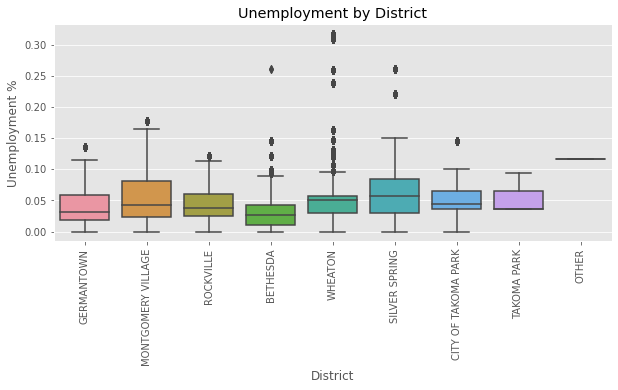

In [760]:
unemp_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Unemployed %')

plt.title('Unemployment by District')
plt.ylabel('Unemployment %')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

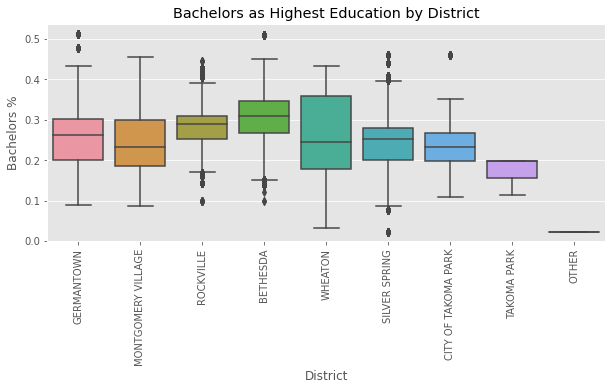

In [761]:
edu_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education by District')
plt.ylabel('Bachelors %')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

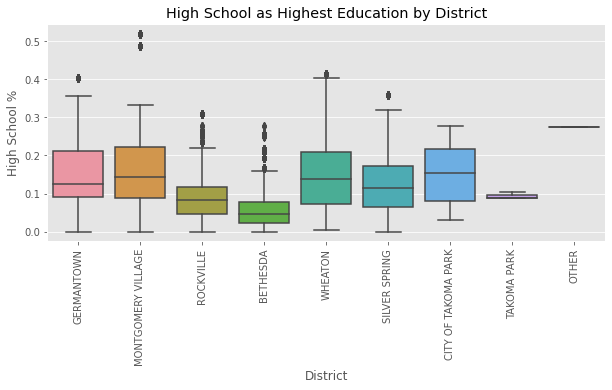

In [762]:
edu_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'High School %')

plt.title('High School as Highest Education by District')
plt.ylabel('High School %')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

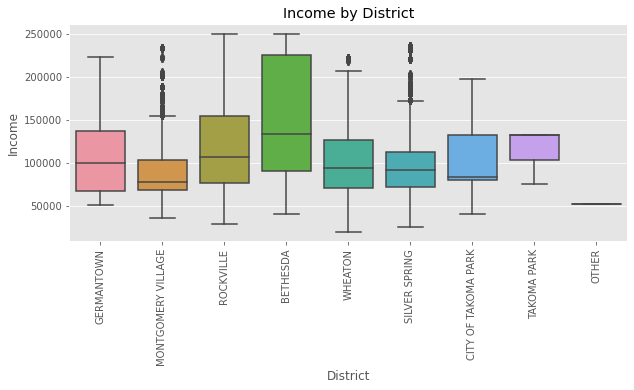

In [763]:
# Side-by-Side Boxplot of Income by Crime Type

income_district = sns.boxplot(data = dataframe5,
                 x = 'Police District Name',
                 y = 'Income')

plt.title('Income by District')
plt.ylabel('Income')
plt.xlabel('District')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

### Analysis of Census Data and Crimes Data

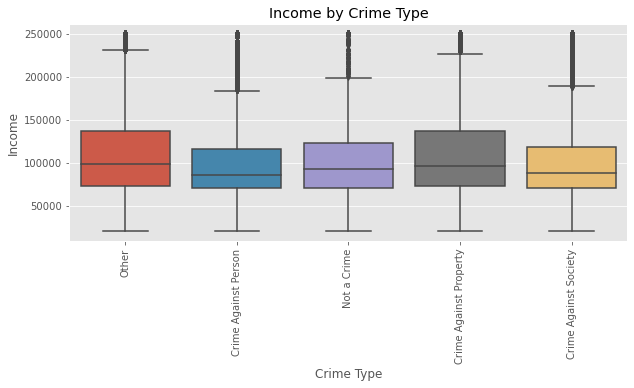

In [764]:
# Side-by-Side Boxplot of Income by Crime Type

income_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Income')

plt.title('Income by Crime Type')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

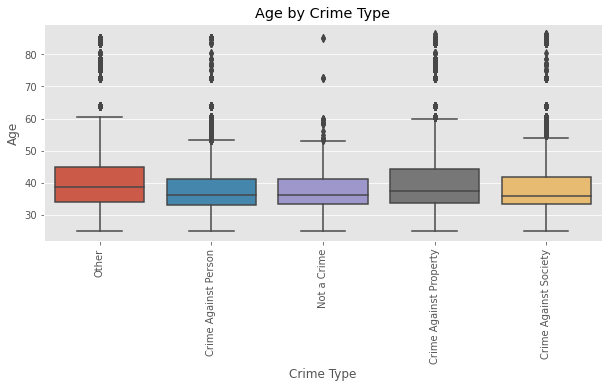

In [765]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Age')

plt.title('Age by Crime Type')
plt.ylabel('Age')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

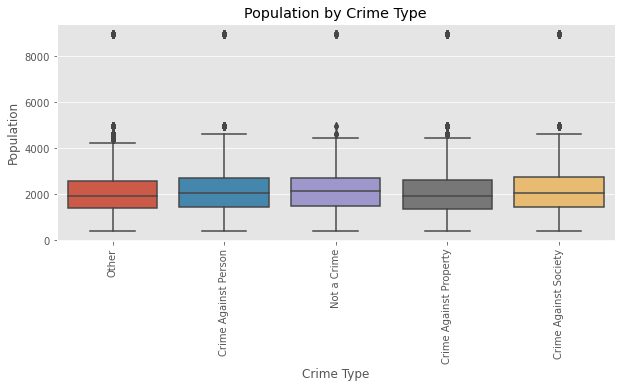

In [766]:
# Side-by-Side Boxplot of  by Crime Type

pop_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Pop')

plt.title('Population by Crime Type')
plt.ylabel('Population')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

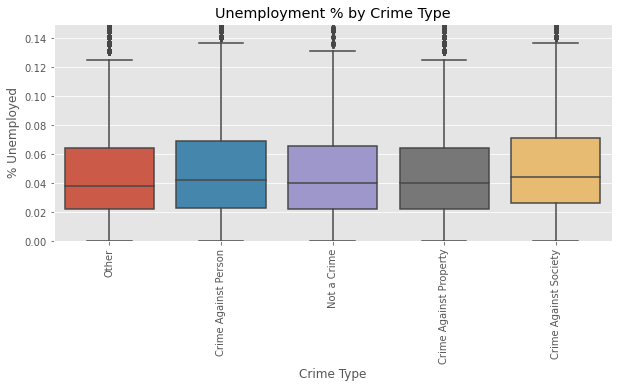

In [767]:
# Side-by-Side Boxplot of  by Crime Type

unemp = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Unemployed %')

plt.title('Unemployment % by Crime Type')
plt.ylabel('% Unemployed')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
unemp.set_ylim([0,0.15])
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

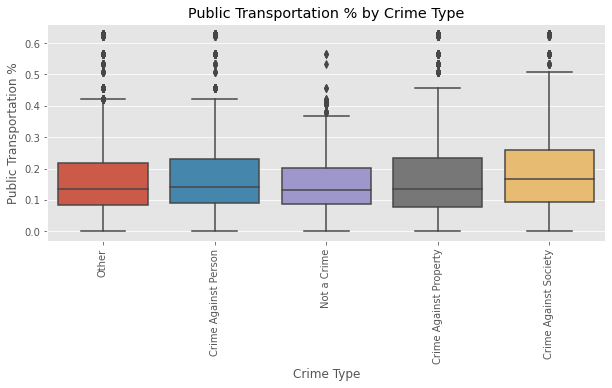

In [768]:
transp = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Public Transportation %')

plt.title('Public Transportation % by Crime Type')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation = 90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

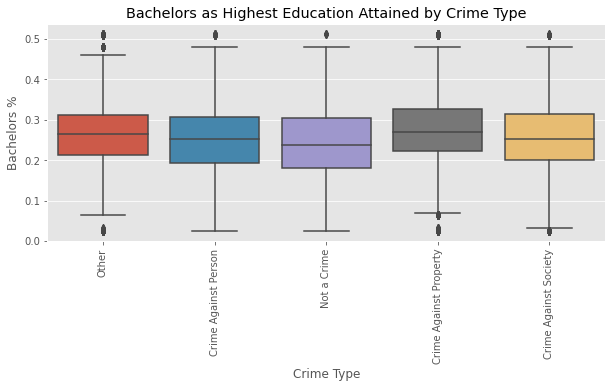

In [769]:
bach = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education Attained by Crime Type')
plt.ylabel('Bachelors %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

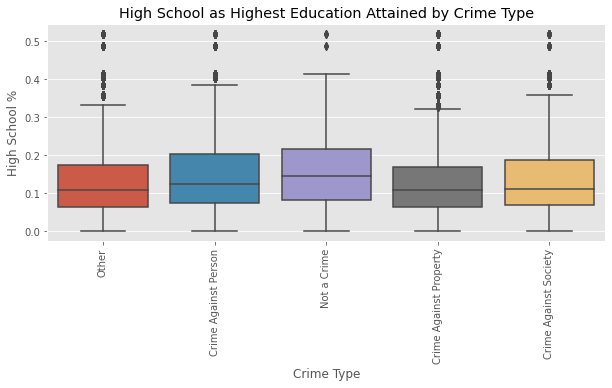

In [770]:
high_school = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [467]:
print('Median Black %: ',np.median(dataframe5['Black %']))
print('Median White %: ',np.median(dataframe5['White %']))
print('Median Asian %: ', np.median(dataframe5['Asian %']))
print('Median American Indian %: ', np.median(dataframe5['American Indian %']))
print('Median Other %: ', np.median(dataframe5['Other Race %']))

Median Black %:  0.20181634712411706
Median White %:  0.493465206640763
Median Asian %:  0.1223175965665236
Median American Indian %:  0.0
Median Other %:  0.045300113250283124


In [468]:
print('Median Male %: ',np.median(dataframe5['Male %']))
print('Median Female %: ',np.median(dataframe5['Female %']))

Median Male %:  0.48336486035384446
Median Female %:  0.5166351396461556


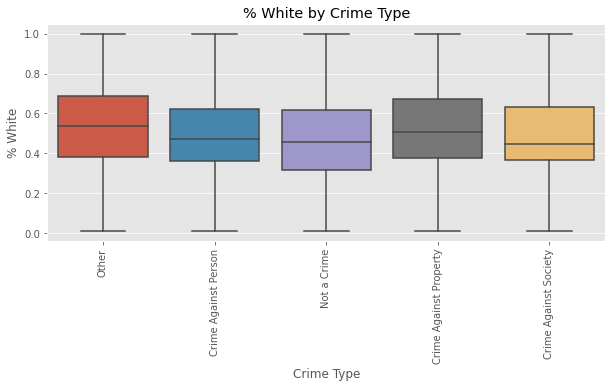

In [771]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'White %')

plt.title('% White by Crime Type')
plt.ylabel('% White')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

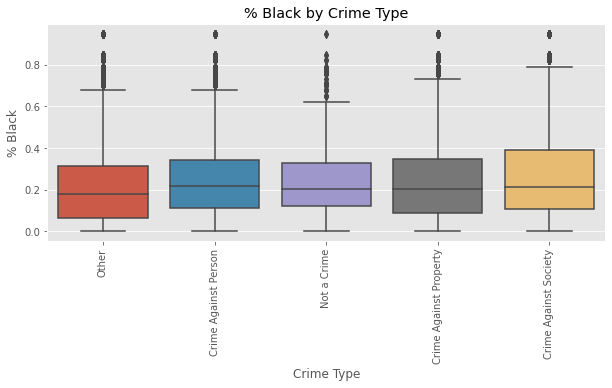

In [772]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Black %')

plt.title('% Black by Crime Type')
plt.ylabel('% Black')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

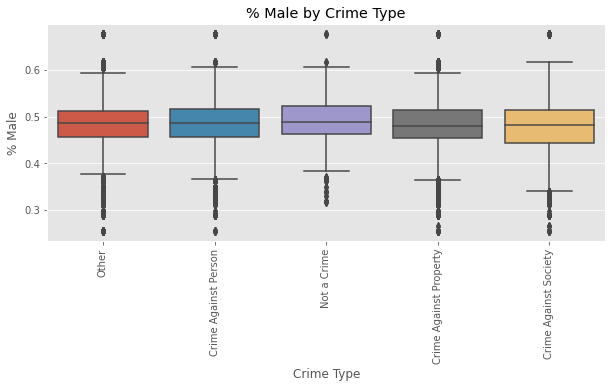

In [773]:
# Side-by-Side Boxplot of Age by Crime Type


age_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1',
                 y = 'Male %')

plt.title('% Male by Crime Type')
plt.ylabel('% Male')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

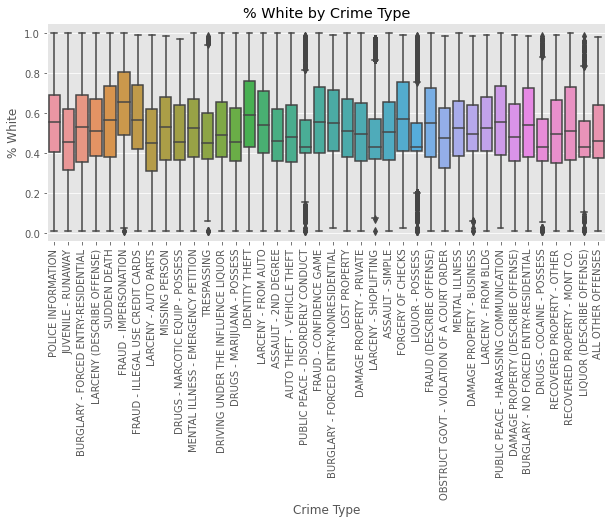

In [710]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'White %')

plt.title('% White by Crime Type')
plt.ylabel('% White')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

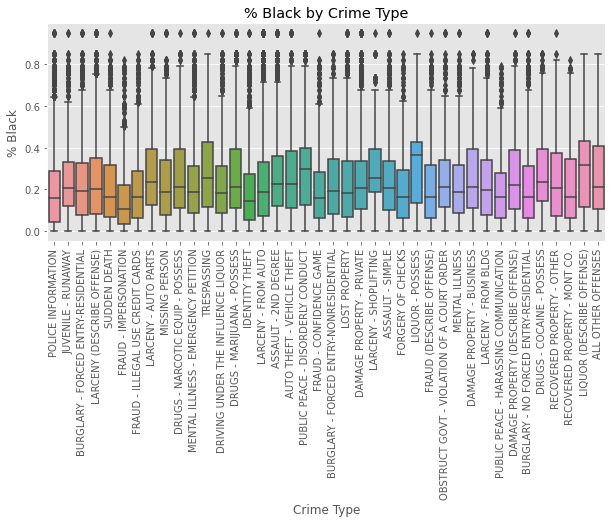

In [715]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Black %')

plt.title('% Black by Crime Type')
plt.ylabel('% Black')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

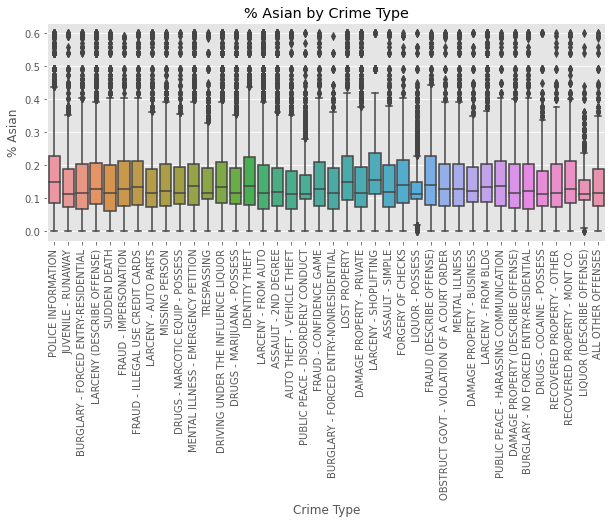

In [714]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Asian %')

plt.title('% Asian by Crime Type')
plt.ylabel('% Asian')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

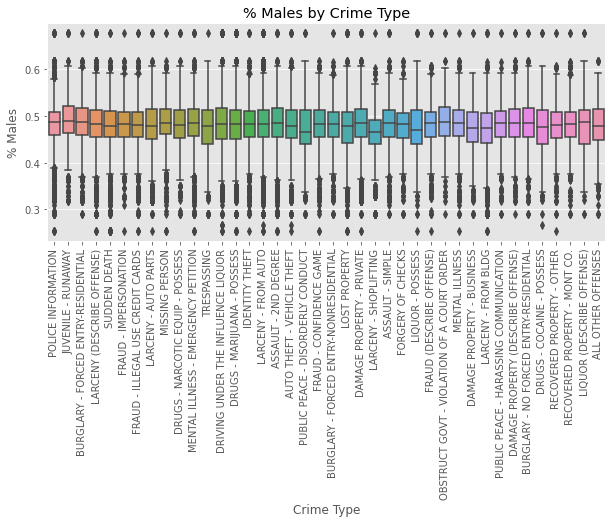

In [713]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Male %')

plt.title('% Males by Crime Type')
plt.ylabel('% Males')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

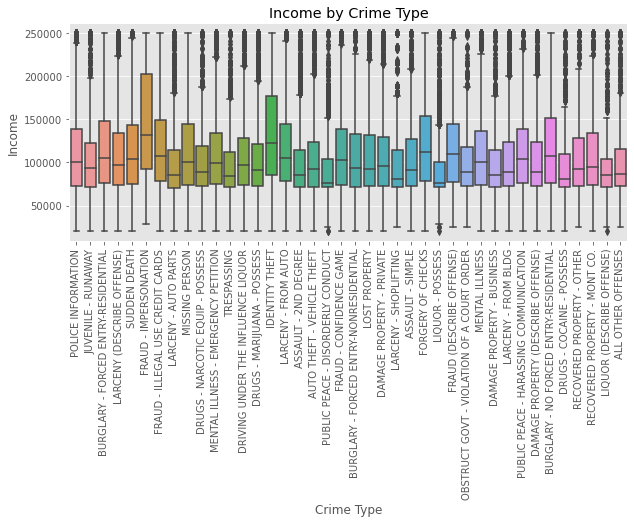

In [717]:
# Side-by-Side Boxplot of Income by Crime Type

income_crime2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Income')

plt.title('Income by Crime Type')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

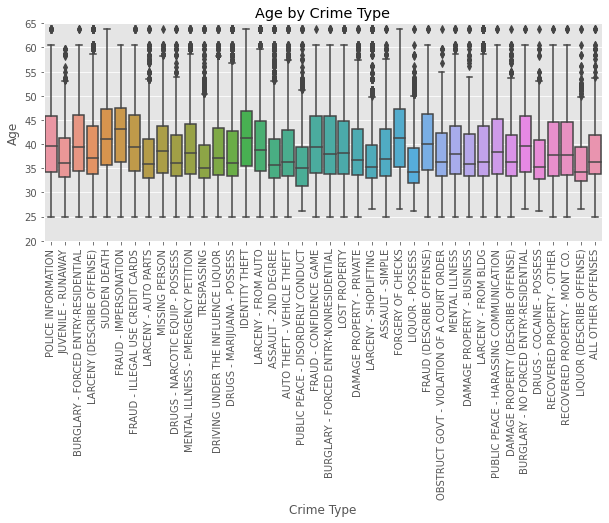

In [718]:
# Side-by-Side Boxplot of Age by Crime Type

age_crime2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Age')

plt.title('Age by Crime Type')
plt.ylabel('Age')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
age_crime2.set_ylim([20,65])
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

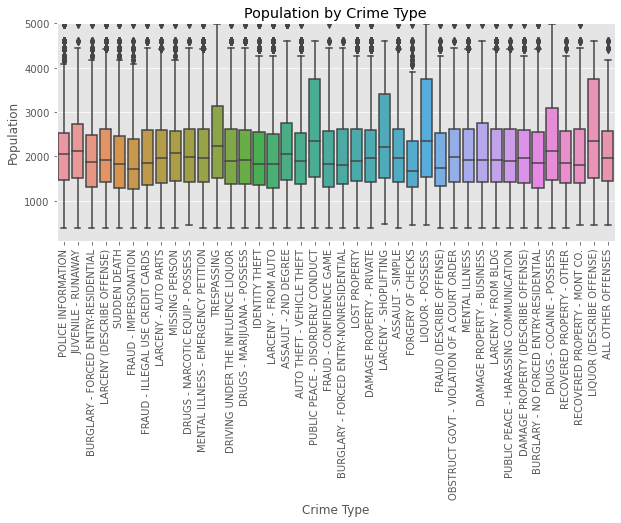

In [719]:
# Side-by-Side Boxplot of  by Crime Type

pop_crime2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Pop')

plt.title('Population by Crime Type')
plt.ylabel('Population')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
pop_crime2.set_ylim([100,5000])
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

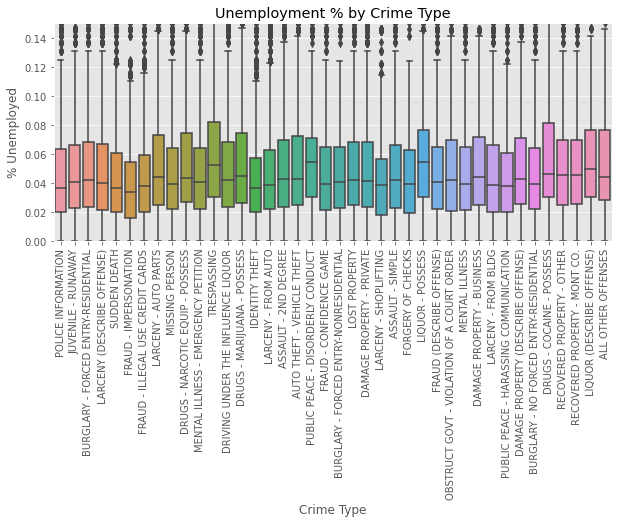

In [720]:
# Side-by-Side Boxplot of  by Crime Type

unemp2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Unemployed %')

plt.title('Unemployment % by Crime Type')
plt.ylabel('% Unemployed')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
unemp2.set_ylim([0,0.15])
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

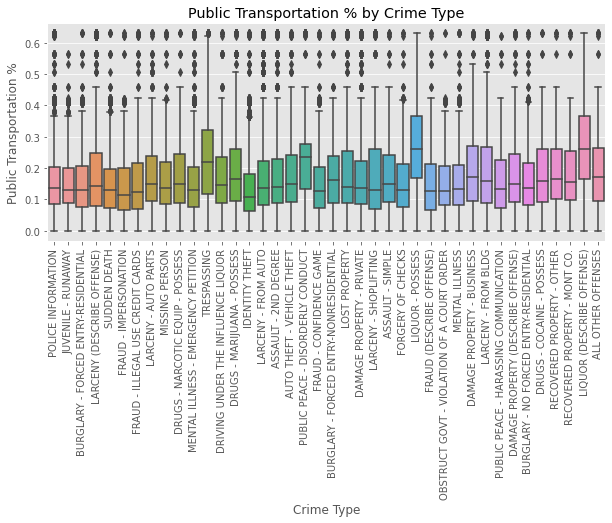

In [721]:
transp2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Public Transportation %')

plt.title('Public Transportation % by Crime Type')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation = 90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

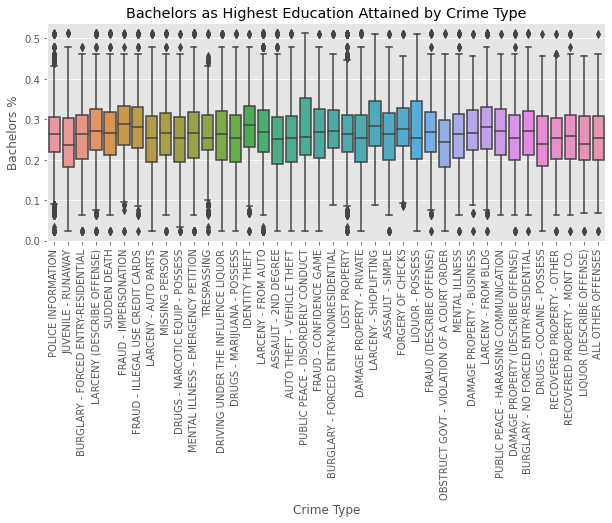

In [722]:
bach2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'Bachelors %')

plt.title('Bachelors as Highest Education Attained by Crime Type')
plt.ylabel('Bachelors %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

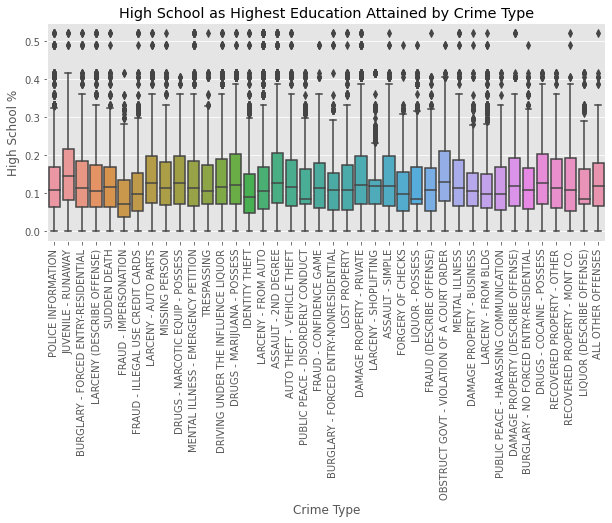

In [723]:
hs2 = sns.boxplot(data = top_crimes_data,
                 x = 'Crime Name3',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

In [485]:
places_sub = dataframe5[dataframe5.groupby('Place').Place.transform("size") >= 3000]
places_sub.head()

Incident ID          City Police District Name    Block  \
50    201268391  GAITHERSBURG           GERMANTOWN  7001011   
51    201234989  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
53    201265326  GAITHERSBURG   MONTGOMERY VILLAGE  7001011   
54    201090622  GAITHERSBURG           GERMANTOWN  7001011   
57    201289578  GAITHERSBURG           GERMANTOWN  7001012   

             Crime Name1         Crime Name2             Crime Name3  Victims  \
50                 Other  All Other Offenses      POLICE INFORMATION        1   
51  Crime Against Person            Fondling  SEX OFFENSE - FONDLING        1   
53                 Other  All Other Offenses      POLICE INFORMATION        1   
54                 Other  All Other Offenses      POLICE INFORMATION        1   
57                 Other  All Other Offenses                OVERDOSE        1   

                        Place     Pop  ...  Bachelors %  \
50  Residence - Single Family  1922.0  ...     0.270167   
51  Residence - Single Family  1922.0  ...     0.270167   
53  Residence - Single Family  1922.0  ...     0.270167   
54             Street - Other  1922.0  ...     0.270167   
57       Street - Residential  1931.0  ...     0.313725   

    Public Transportation %  Unemployed %    Male %  Female %   White %  \
50                 0.049515      0.029053  0.525494  0.474506  0.803846   
51                 0.049515      0.029053  0.525494  0.474506  0.803846   
53                 0.049515      0.029053  0.525494  0.474506  0.803846   
54                 0.049515      0.029053  0.525494  0.474506  0.803846   
57                 0.065817      0.048869  0.455205  0.544795  0.757643   

     Black %   Asian %  American Indian % Other Race %  
50  0.101099  0.087912                0.0     0.007143  
51  0.101099  0.087912                0.0     0.007143  
53  0.101099  0.087912                0.0     0.007143  
54  0.101099  0.087912                0.0     0.007143  
57  0.021679  0.101723                0.0     0.118955  

[5 rows x 41 columns]

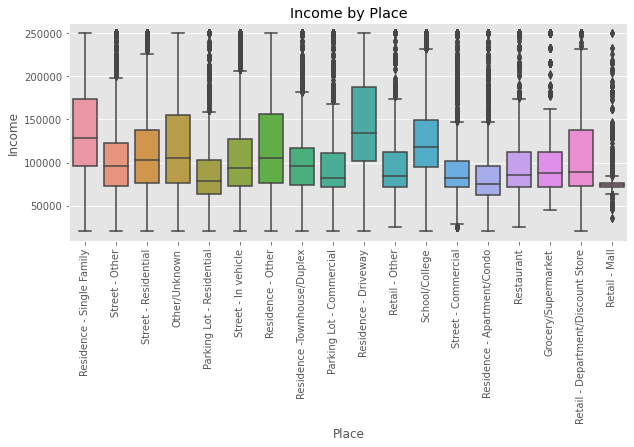

In [724]:
# Side-by-Side Boxplot of Income by Crime Type

income_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Income')

plt.title('Income by Place')
plt.ylabel('Income')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

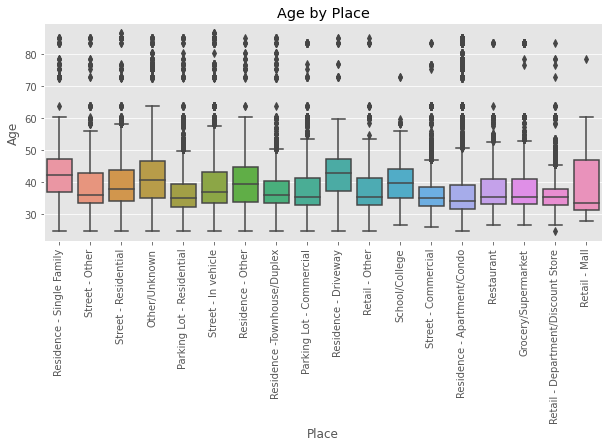

In [725]:
age_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Age')

plt.title('Age by Place')
plt.ylabel('Age')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

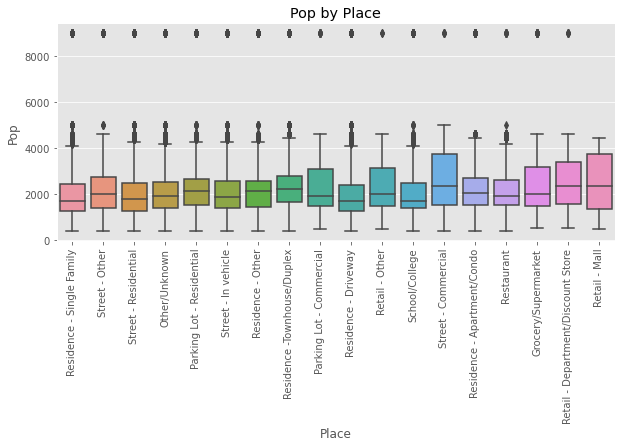

In [726]:
pop_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Pop')

plt.title('Pop by Place')
plt.ylabel('Pop')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

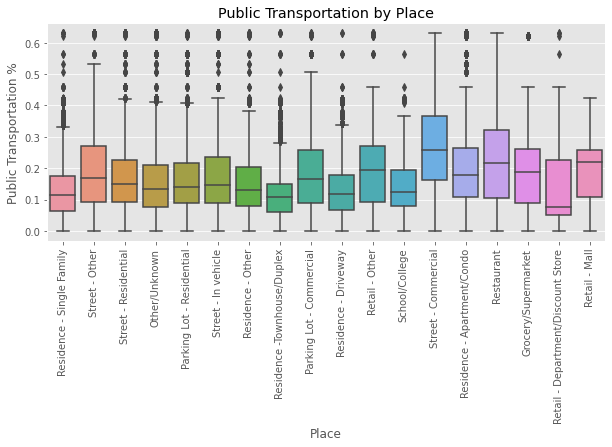

In [727]:
transp_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Public Transportation %')

plt.title('Public Transportation by Place')
plt.ylabel('Public Transportation %')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

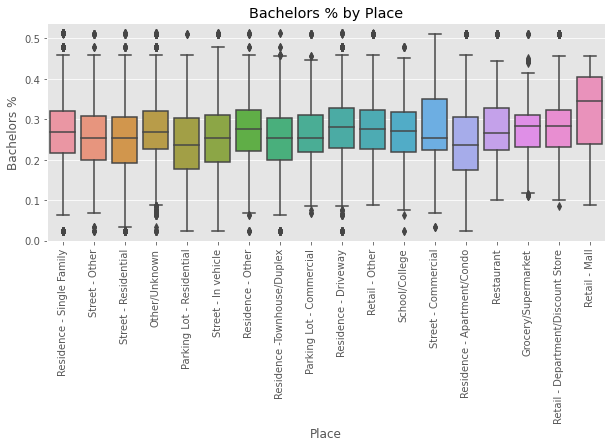

In [728]:
bach_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Bachelors %')

plt.title('Bachelors % by Place')
plt.ylabel('Bachelors %')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

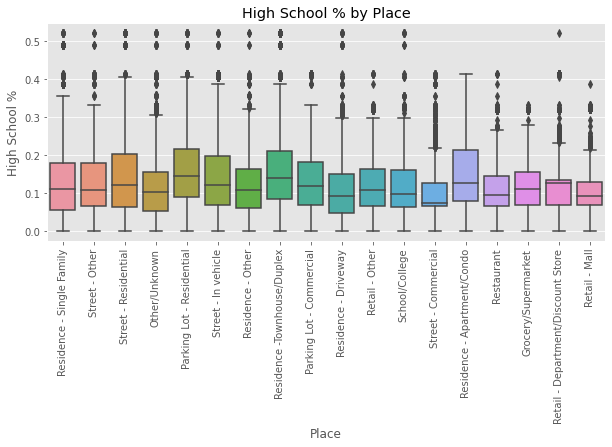

In [729]:
hs_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'High School %')

plt.title('High School % by Place')
plt.ylabel('High School %')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

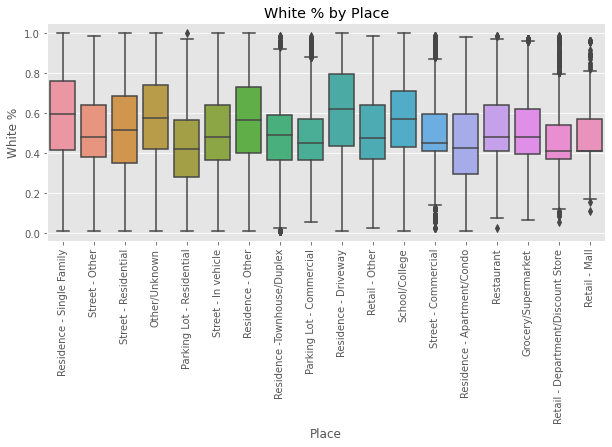

In [779]:
white_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'White %')

plt.title('White % by Place')
plt.ylabel('White %')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

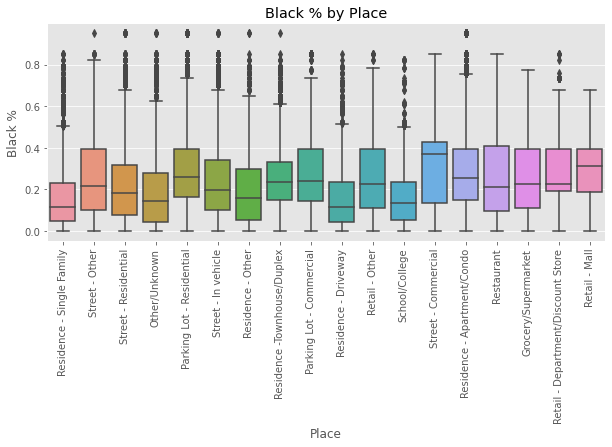

In [782]:
white_place = sns.boxplot(data = places_sub,
                 x = 'Place',
                 y = 'Black %')

plt.title('Black % by Place')
plt.ylabel('Black %')
plt.xlabel('Place')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

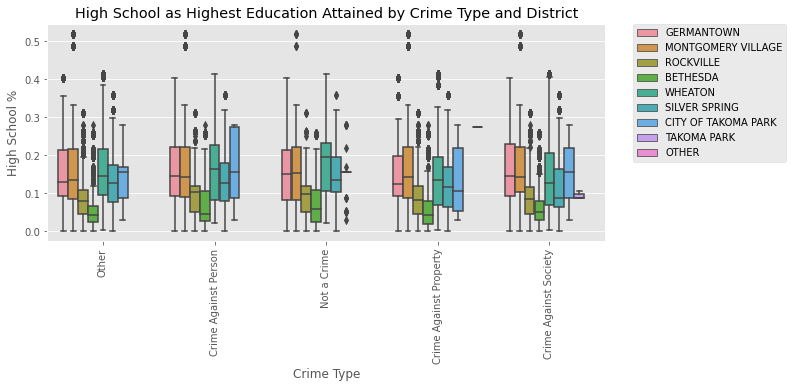

In [730]:
high_school_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'High School %')

plt.title('High School as Highest Education Attained by Crime Type and District')
plt.ylabel('High School %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

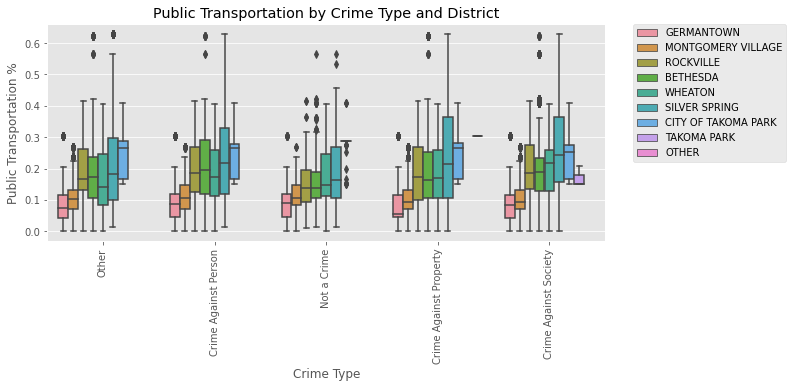

In [731]:
transp_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Public Transportation %')

plt.title('Public Transportation by Crime Type and District')
plt.ylabel('Public Transportation %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

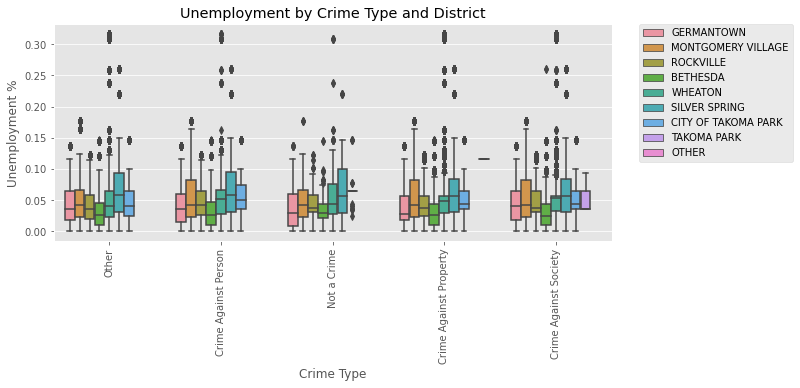

In [732]:
unemp_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Unemployed %')

plt.title('Unemployment by Crime Type and District')
plt.ylabel('Unemployment %')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

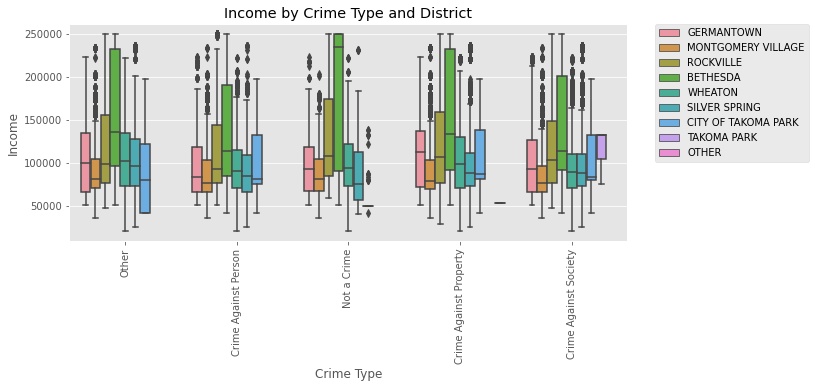

In [733]:
income_crime = sns.boxplot(data = dataframe5,
                 x = 'Crime Name1', 
                 hue = 'Police District Name',
                 y = 'Income')

plt.title('Income by Crime Type and District')
plt.ylabel('Income')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig=plt.gcf()
fig.set_size_inches(10,4)
plt.show()

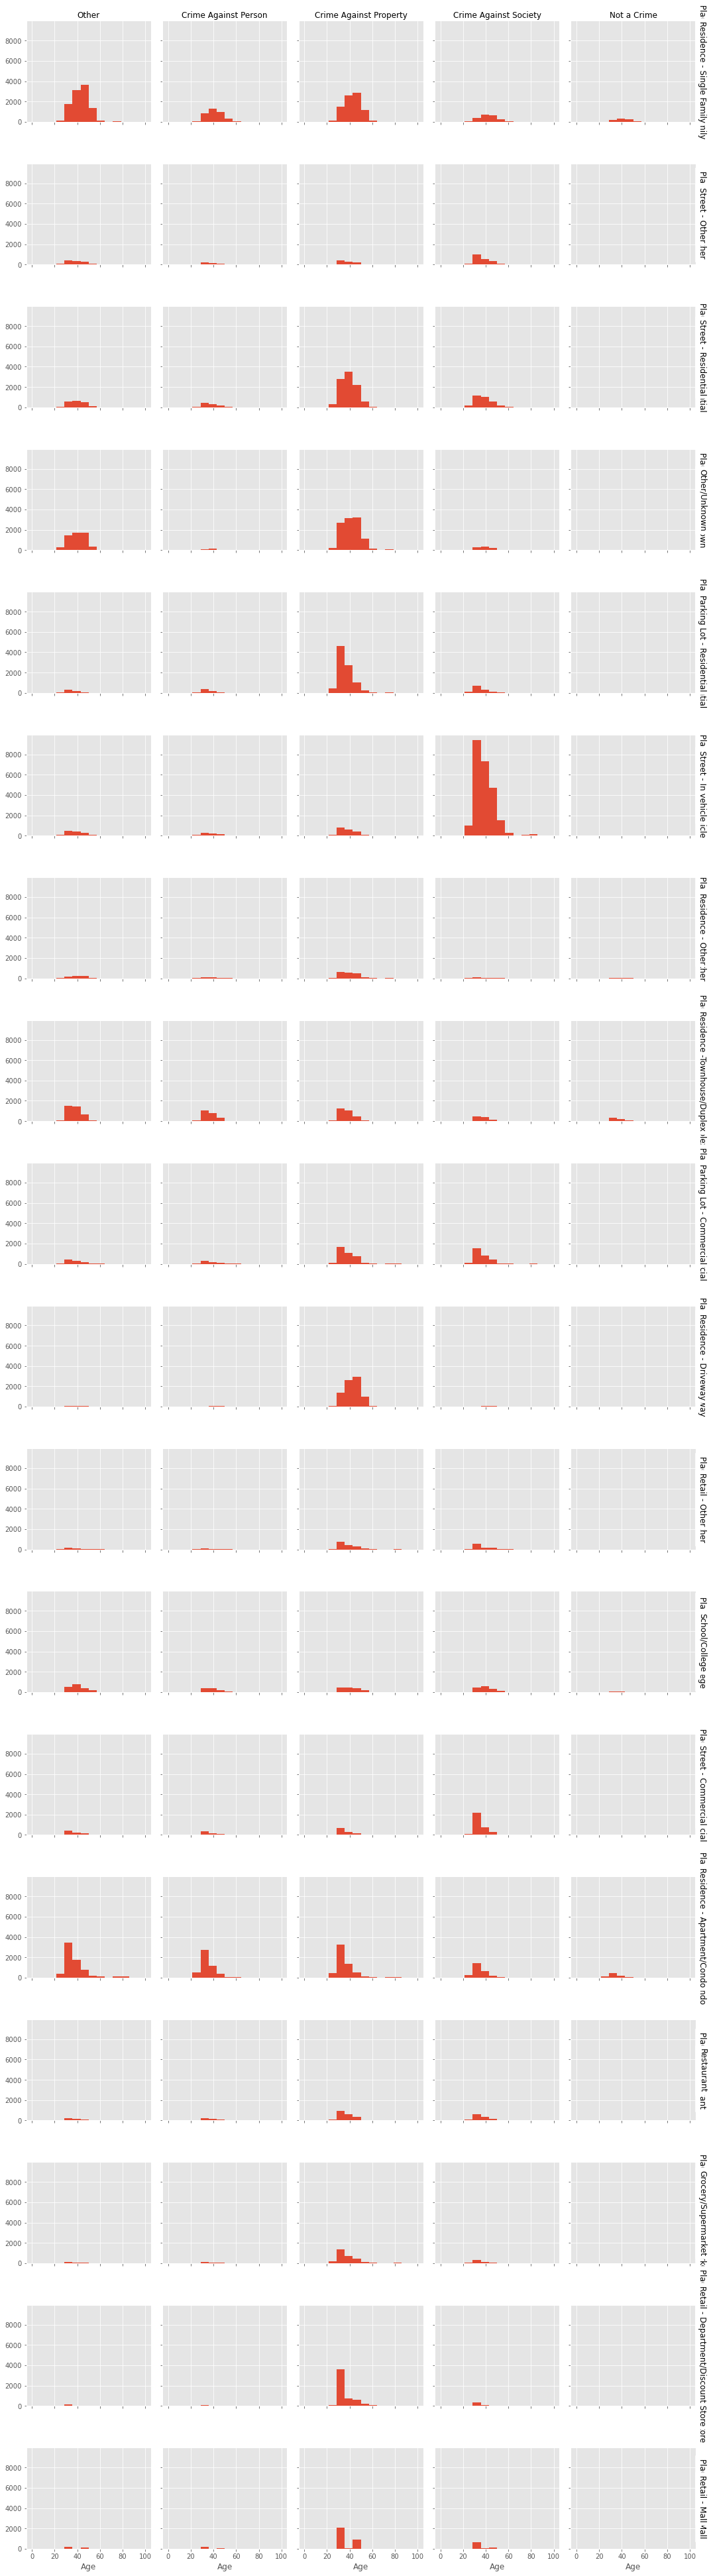

In [496]:
grid2 = sns.FacetGrid(places_sub, row='Place', col='Crime Name1',margin_titles=True)
grid2.map(plt.hist, 'Age', bins = np.linspace(0,100,15))
grid2.set_titles(col_template = '{col_name}', row_template = '{row_name}')
plt.tight_layout()


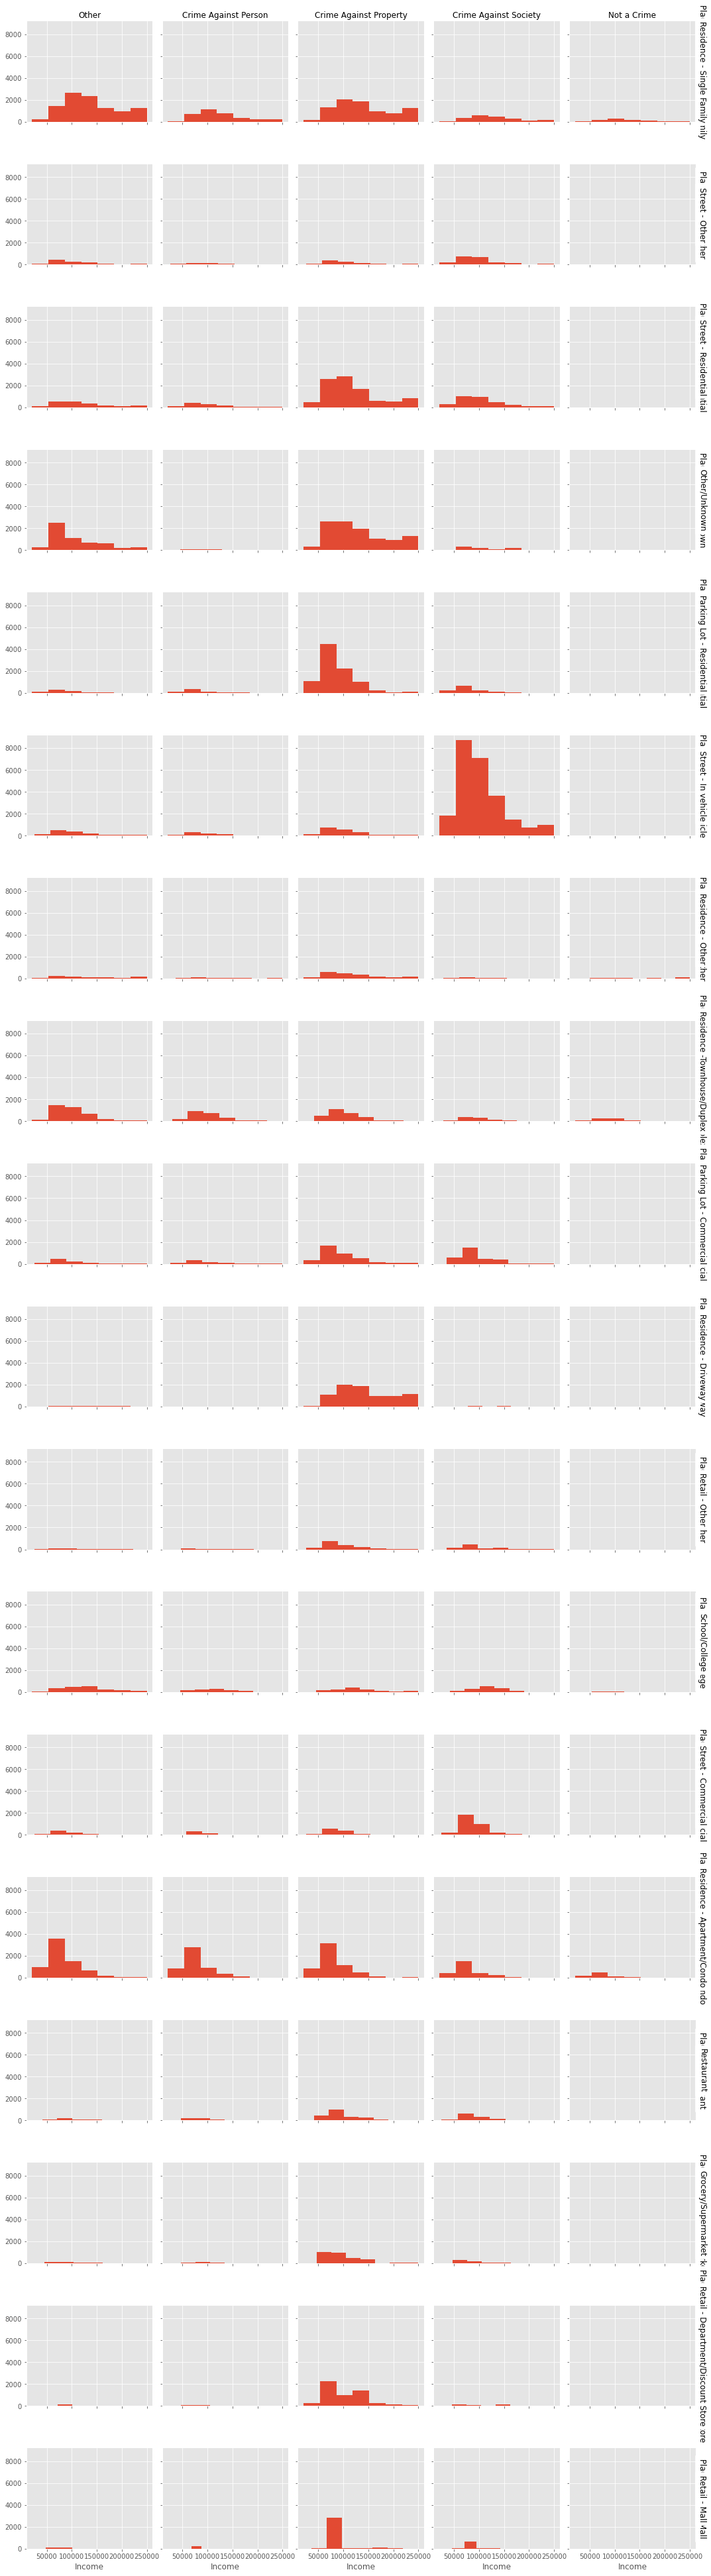

In [497]:
grid2 = sns.FacetGrid(places_sub, row='Place', col='Crime Name1',margin_titles=True)
grid2.map(plt.hist, 'Income', bins=7)
grid2.set_titles(col_template = '{col_name}', row_template = '{row_name}')
plt.tight_layout()

In [500]:
crime_data = pd.DataFrame(dataframe5['Crime Name3'].value_counts())
crime_data.head(20)

Crime Name3
LARCENY - FROM AUTO                        20699
DRUGS - MARIJUANA - POSSESS                14408
POLICE INFORMATION                         13417
ASSAULT - 2ND DEGREE                       12724
LARCENY - SHOPLIFTING                      12145
DRIVING UNDER THE INFLUENCE LIQUOR         11747
LARCENY (DESCRIBE OFFENSE)                  9687
DAMAGE PROPERTY - PRIVATE                   9123
MENTAL ILLNESS - EMERGENCY PETITION         8595
LARCENY - FROM BLDG                         8310
LOST PROPERTY                               8237
IDENTITY THEFT                              4896
SUDDEN DEATH                                4417
LIQUOR - POSSESS                            4411
PUBLIC PEACE - DISORDERLY CONDUCT           4318
AUTO THEFT - VEHICLE THEFT                  4149
LARCENY - AUTO PARTS                        4056
MISSING PERSON                              3589
TRESPASSING                                 3378
FRAUD - ILLEGAL USE CREDIT CARDS            3358

In [502]:
dataframe5.to_csv('Crime_Clean2.csv')

In [503]:
len(dataframe5)

235368

In [504]:
dataframe5['Crime Name3'].value_counts()

LARCENY - FROM AUTO                        20699
DRUGS - MARIJUANA - POSSESS                14408
POLICE INFORMATION                         13417
ASSAULT - 2ND DEGREE                       12724
LARCENY - SHOPLIFTING                      12145
                                           ...  
COMM SEX OFF - KEEPING HOUSE ILL FAME          1
DAMAGE PROPERTY - PUBLIC-WITH EXPLOSIVE        1
LIQUOR - MANUFACTURE                           1
NON SUPPORT                                    1
PUBLIC PEACE - ASSEMBLY - UNLAWFUL             1
Name: Crime Name3, Length: 326, dtype: int64